In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from IPython.display import display
import matplotlib.pyplot as plt

In [2]:
import pymongo
from pymongo import MongoClient
client = MongoClient()
db = client.dota
collection = db.team_matches
data = pd.DataFrame(list(collection.find()))

In [3]:
data.head()

,_id,dire_pick_1,dire_pick_2,dire_pick_3,dire_pick_4,dire_pick_5,dire_team_id,duration,first_pick_team,match_id,patch,radiant_pick_1,radiant_pick_2,radiant_pick_3,radiant_pick_4,radiant_pick_5,radiant_team_id,start_time,winner
0,5d40e8abfebb1b39596ab497,106,2,57,46,26,1838315,2473,Dire,4865821968,41,97,8,64,111,19,2586976,1561547432,Radiant
1,5d40e8abfebb1b39596ab498,79,18,25,108,72,1838315,1622,Radiant,4865712667,41,71,55,64,74,93,2586976,1561544009,Radiant
2,5d40e8abfebb1b39596ab499,71,106,112,99,54,1838315,1859,Dire,4861754075,41,96,79,18,57,36,1883502,1561374092,Radiant
3,5d40e8abfebb1b39596ab49a,33,71,8,110,114,1838315,3167,Dire,4861607434,41,37,69,26,80,10,1883502,1561368799,Dire
4,5d40e8abfebb1b39596ab49b,83,46,101,85,54,1838315,3569,Radiant,4861467475,41,18,121,71,110,50,1883502,1561363362,Radiant


In [4]:
hero_data = pd.DataFrame(list(db.team_hero_stats.find({'team_id':1838315})))
hero_data.head()
hero_data = hero_data['hero_data']
# print(hero_data[0])
hero_id_dict = {}
hero_ids_only = []
for each_hero in hero_data[0]:
#     print(hero_data[0][each_hero]['localized_name'])
    hero_id_dict[int(each_hero)] = hero_data[0][each_hero]['localized_name']
    hero_ids_only.append(int(each_hero))
#     print('----')
print(hero_id_dict)
print(len(hero_id_dict))
hero_ids_only.sort()
print(hero_ids_only)
hero_names_only = []
for each_hero in hero_ids_only:
    hero_names_only.append(hero_id_dict[each_hero])
print(hero_names_only)

{86: 'Rubick', 106: 'Ember Spirit', 7: 'Earthshaker', 50: 'Dazzle', 29: 'Tidehunter', 33: 'Enigma', 91: 'Io', 3: 'Bane', 5: 'Crystal Maiden', 13: 'Puck', 11: 'Shadow Fiend', 69: 'Doom', 30: 'Witch Doctor', 55: 'Dark Seer', 74: 'Invoker', 20: 'Vengeful Spirit', 62: 'Bounty Hunter', 9: 'Mirana', 88: 'Nyx Assassin', 26: 'Lion', 84: 'Ogre Magi', 39: 'Queen of Pain', 103: 'Elder Titan', 51: 'Clockwerk', 66: 'Chen', 53: "Nature's Prophet", 100: 'Tusk', 65: 'Batrider', 15: 'Razor', 6: 'Drow Ranger', 109: 'Terrorblade', 2: 'Axe', 99: 'Bristleback', 12: 'Phantom Lancer', 76: 'Outworld Devourer', 10: 'Morphling', 98: 'Timbersaw', 68: 'Ancient Apparition', 28: 'Slardar', 78: 'Brewmaster', 19: 'Tiny', 90: 'Keeper of the Light', 23: 'Kunkka', 80: 'Lone Druid', 8: 'Juggernaut', 16: 'Sand King', 79: 'Shadow Demon', 114: 'Monkey King', 17: 'Storm Spirit', 107: 'Earth Spirit', 87: 'Disruptor', 95: 'Troll Warlord', 71: 'Spirit Breaker', 63: 'Weaver', 44: 'Phantom Assassin', 72: 'Gyrocopter', 21: 'Windra

In [5]:
#don't need mongodb _id, match_id can be the index.
data = data.drop(columns={'_id'})
data.set_index("match_id",inplace=True)
data.head()

,dire_pick_1,dire_pick_2,dire_pick_3,dire_pick_4,dire_pick_5,dire_team_id,duration,first_pick_team,patch,radiant_pick_1,radiant_pick_2,radiant_pick_3,radiant_pick_4,radiant_pick_5,radiant_team_id,start_time,winner
match_id,,,,,,,,,,,,,,,,,
4865821968,106,2,57,46,26,1838315,2473,Dire,41,97,8,64,111,19,2586976,1561547432,Radiant
4865712667,79,18,25,108,72,1838315,1622,Radiant,41,71,55,64,74,93,2586976,1561544009,Radiant
4861754075,71,106,112,99,54,1838315,1859,Dire,41,96,79,18,57,36,1883502,1561374092,Radiant
4861607434,33,71,8,110,114,1838315,3167,Dire,41,37,69,26,80,10,1883502,1561368799,Dire
4861467475,83,46,101,85,54,1838315,3569,Radiant,41,18,121,71,110,50,1883502,1561363362,Radiant


In [6]:
data.count()
#good, no missing values. all have 5199 values.

dire_pick_1        5199
dire_pick_2        5199
dire_pick_3        5199
dire_pick_4        5199
dire_pick_5        5199
dire_team_id       5199
duration           5199
first_pick_team    5199
patch              5199
radiant_pick_1     5199
radiant_pick_2     5199
radiant_pick_3     5199
radiant_pick_4     5199
radiant_pick_5     5199
radiant_team_id    5199
start_time         5199
winner             5199
dtype: int64

In [7]:
data['patch'].unique()

array([41, 40, 39, 38, 35, 34, 33, 31, 30, 29, 28, 26, 25, 32, 27, 36, 37],
      dtype=int64)

In [8]:
#uncapitalize radiant/dire
data['winner'] = data['winner'].str.lower()
data['first_pick_team'] = data['first_pick_team'].str.lower()
data.head()

,dire_pick_1,dire_pick_2,dire_pick_3,dire_pick_4,dire_pick_5,dire_team_id,duration,first_pick_team,patch,radiant_pick_1,radiant_pick_2,radiant_pick_3,radiant_pick_4,radiant_pick_5,radiant_team_id,start_time,winner
match_id,,,,,,,,,,,,,,,,,
4865821968,106,2,57,46,26,1838315,2473,dire,41,97,8,64,111,19,2586976,1561547432,radiant
4865712667,79,18,25,108,72,1838315,1622,radiant,41,71,55,64,74,93,2586976,1561544009,radiant
4861754075,71,106,112,99,54,1838315,1859,dire,41,96,79,18,57,36,1883502,1561374092,radiant
4861607434,33,71,8,110,114,1838315,3167,dire,41,37,69,26,80,10,1883502,1561368799,dire
4861467475,83,46,101,85,54,1838315,3569,radiant,41,18,121,71,110,50,1883502,1561363362,radiant


In [9]:
n_matches = data.shape[0]
n_features = data.shape[1]-1
n_Radiant_wins = len(data[data.winner == "radiant"])

print(f'Number of Features: {n_features}')
print(f'Total Matches: {n_matches}')
print(f'Radiant Win Pct: {n_Radiant_wins/n_matches*100}%')

Number of Features: 16
Total Matches: 5199
Radiant Win Pct: 53.818041931140606%


<BarContainer object of 2 artists>

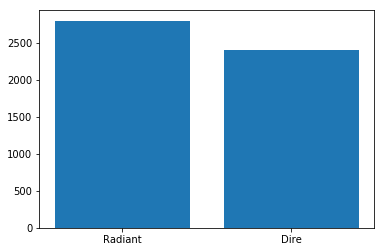

In [10]:
plt.bar(['Radiant','Dire'],[len(data[data.winner=="radiant"]),len(data[data.winner=="dire"])])

In [11]:
hero_win_pct = []
for each_hero in hero_ids_only:
    picks = 0
    wins = 0
    for i in range(1,6):
        for j in ['radiant','dire']:
            picks += len(data[data[f'{j}_pick_{i}']==each_hero])
            wins += len(data[(data[f'{j}_pick_{i}']==each_hero) & (data['winner']==j)])
    if picks != 0:
        print(f'{hero_id_dict[each_hero]} ({each_hero}) won {wins} out of {picks} games for a win pct of {wins/picks*100}')
    else:
        print(f'hero id {each_hero} was never picked.')
    hero_win_pct.append(wins/picks*100)

Anti-Mage (1) won 163 out of 316 games for a win pct of 51.58227848101266
Axe (2) won 128 out of 283 games for a win pct of 45.22968197879859
Bane (3) won 486 out of 883 games for a win pct of 55.03963759909399
Bloodseeker (4) won 127 out of 249 games for a win pct of 51.00401606425703
Crystal Maiden (5) won 142 out of 279 games for a win pct of 50.89605734767025
Drow Ranger (6) won 172 out of 339 games for a win pct of 50.737463126843664
Earthshaker (7) won 459 out of 874 games for a win pct of 52.517162471395885
Juggernaut (8) won 221 out of 501 games for a win pct of 44.11177644710579
Mirana (9) won 267 out of 514 games for a win pct of 51.9455252918288
Morphling (10) won 285 out of 548 games for a win pct of 52.00729927007299
Shadow Fiend (11) won 204 out of 418 games for a win pct of 48.803827751196174
Phantom Lancer (12) won 293 out of 589 games for a win pct of 49.745331069609506
Puck (13) won 357 out of 812 games for a win pct of 43.96551724137931
Pudge (14) won 30 out of 65 ga

Grimstroke (121) won 173 out of 415 games for a win pct of 41.68674698795181
Mars (129) won 36 out of 70 games for a win pct of 51.42857142857142


<BarContainer object of 117 artists>

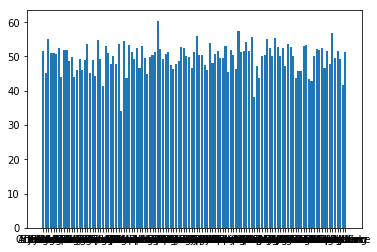

In [12]:
plt.bar(hero_names_only,hero_win_pct)
#ugly graph, but mostly just care to see the distribution. a few heroes outlier at 55-60%, some outliers at 35-40%, but mostly in the 50% range

In [13]:
# from keras.utils import to_categorical
data_df = pd.concat([data,pd.get_dummies(data['first_pick_team'], prefix='fp')],axis=1,sort=False)
data_df.drop(['first_pick_team'],axis=1, inplace=True)
data_df.head()
# pd.get_dummies(data['first_pick_team'], prefix='fp')

,dire_pick_1,dire_pick_2,dire_pick_3,dire_pick_4,dire_pick_5,dire_team_id,duration,patch,radiant_pick_1,radiant_pick_2,radiant_pick_3,radiant_pick_4,radiant_pick_5,radiant_team_id,start_time,winner,fp_dire,fp_radiant
match_id,,,,,,,,,,,,,,,,,,
4865821968,106,2,57,46,26,1838315,2473,41,97,8,64,111,19,2586976,1561547432,radiant,1,0
4865712667,79,18,25,108,72,1838315,1622,41,71,55,64,74,93,2586976,1561544009,radiant,0,1
4861754075,71,106,112,99,54,1838315,1859,41,96,79,18,57,36,1883502,1561374092,radiant,1,0
4861607434,33,71,8,110,114,1838315,3167,41,37,69,26,80,10,1883502,1561368799,dire,1,0
4861467475,83,46,101,85,54,1838315,3569,41,18,121,71,110,50,1883502,1561363362,radiant,0,1


In [14]:
y_full = data_df['winner']
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_full)
y_full = le.transform(y_full)
X_full = data_df.drop(['winner','duration','start_time'],1) # re run later with patch dropped?

In [15]:
le.classes_

array(['dire', 'radiant'], dtype=object)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, train_size=0.85, test_size=0.15, random_state = 42)
#label encoding team IDs

X_full_le = X_full.copy()
le_teams = preprocessing.LabelEncoder()
le_teams.fit(X_full['radiant_team_id'].append(X_full['dire_team_id']))
X_full_le['dire_team_id'] = le_teams.transform(X_full_le['dire_team_id'])
X_full_le['radiant_team_id'] = le_teams.transform(X_full_le['radiant_team_id'])
X_train_le, X_test_le, y_train_le, y_test_le = train_test_split(X_full_le, y_full, train_size=0.85, test_size=0.15,random_state = 42)

In [17]:
#number of unique team IDs combine on both sides should be equal to number of label encoded classes
print(X_full['dire_team_id'].append(X_full['radiant_team_id']).unique().shape)
print(le_teams.classes_.shape)

(297,)
(297,)


In [18]:
le_teams.classes_

array([      3,       4,       5,      15,      20,      26,      36,
            39,      46,      67,    2163,  111474,  350190,  464103,
        486667,  534136,  543897,  726228, 1105664, 1245961, 1276785,
       1333179, 1366506, 1375614, 1498062, 1520578, 1838315, 1846548,
       1883502, 1905619, 1951061, 1964407, 1983234, 2006913, 2108395,
       2197847, 2512249, 2527544, 2537636, 2581813, 2586976, 2621843,
       2626685, 2634810, 2640025, 2643401, 2659468, 2672298, 2686375,
       2736464, 2786652, 2790766, 2833354, 2880140, 2920471, 2967569,
       3152713, 3214090, 3258149, 3262331, 3262512, 3265632, 3325252,
       3325406, 3326875, 3327688, 3331948, 3349045, 3477208, 3547682,
       3586078, 3653540, 3659536, 3704482, 3705786, 3715574, 3718685,
       3725701, 3785359, 3786981, 3888404, 3930476, 3931002, 3931472,
       3963460, 4100699, 4151852, 4186376, 4251435, 4254415, 4280072,
       4287101, 4288603, 4324365, 4328182, 4369633, 4372767, 4424013,
       4425117, 4425

In [19]:
from sklearn.metrics import f1_score
match_weight = X_train['patch']/41
# weighting recent patch matches stronger than old ones. Newest patch is #41, so 41/41 = 1. Older patch like patch 26 will results
# in weight of 26/41 or 0.63

log_model = LogisticRegression(random_state = 42,solver='lbfgs')
svc_model = SVC(random_state=42, kernel='rbf', gamma='scale')
xgb_model = xgb.XGBClassifier(seed=42,max_depth=2,n_estimators=136)
#depth and n_estimators "fitted" later in the notebook
# ISSUE: XGB does not handle categoricals, only numerical. So team_ID, heros not being One Hot Encoded is problematic
# Even Label Encoded doesn't work

log_model.fit(X_train, y_train)
y_predictions = log_model.predict(X_test)
print('Logistic Regression')
print(f'train.score: {log_model.score(X_train,y_train)}')
print(f'test.score:  {log_model.score(X_test,y_test)}')
print(f'f1:          {f1_score(y_test, y_predictions)}')
print('-'*12)

log_model.fit(X_train_le, y_train_le)
y_predictions = log_model.predict(X_test_le)
print('Logistic Regression, team id label encoded')
print(f'train.score: {log_model.score(X_train_le,y_train_le)}')
print(f'test.score:  {log_model.score(X_test_le,y_test_le)}')
print(f'f1:          {f1_score(y_test_le, y_predictions)}')
print('-'*12)

svc_model.fit(X_train, y_train)
y_predictions = svc_model.predict(X_test)
print('SVC model')
print(f'train.score: {svc_model.score(X_train,y_train)}')
print(f'test.score:  {svc_model.score(X_test,y_test)}')
print(f'f1:          {f1_score(y_test, y_predictions)}')
print('-'*12)

svc_model.fit(X_train_le, y_train_le)
y_predictions = svc_model.predict(X_test)
print('SVC model, team id label encoded')
print(f'train.score: {svc_model.score(X_train_le,y_train_le)}')
print(f'test.score:  {svc_model.score(X_test_le,y_test_le)}')
print(f'f1:          {f1_score(y_test_le, y_predictions)}')
print('-'*12)

xgb_model.fit(X_train, y_train)
y_predictions = xgb_model.predict(X_test)
print('XGB model no weight')
print(f'train.score: {xgb_model.score(X_train,y_train)}')
print(f'test.score:  {xgb_model.score(X_test,y_test)}')
print(f'f1:          {f1_score(y_test, y_predictions)}')
print('-'*12)

xgb_model.fit(X_train_le, y_train_le,sample_weight = match_weight)
y_predictions_le = xgb_model.predict(X_test_le)
print('XGB model patch weighted, team label encoded')
print(f'train.score: {xgb_model.score(X_train_le,y_train_le)}')
print(f'test.score:  {xgb_model.score(X_test_le,y_test_le)}')
print(f'f1:          {f1_score(y_test_le, y_predictions_le)}')
print('-'*12)

xgb_model.fit(X_train, y_train,sample_weight = match_weight)
y_predictions = xgb_model.predict(X_test)
print('XGB model patch weighted')
print(f'train.score: {xgb_model.score(X_train,y_train)}')
print(f'test.score:  {xgb_model.score(X_test,y_test)}')
print(f'f1:          {f1_score(y_test, y_predictions)}')
print('-'*12)

Logistic Regression
train.score: 0.5842950893867391
test.score:  0.5743589743589743
f1:          0.6139534883720931
------------
Logistic Regression, team id label encoded
train.score: 0.5994568906992532
test.score:  0.5987179487179487
f1:          0.6796315250767656
------------
SVC model
train.score: 0.7180357546956325
test.score:  0.5807692307692308
f1:          0.6487647690655209
------------
SVC model, team id label encoded
train.score: 1.0
test.score:  0.5423076923076923
f1:          0.7032418952618454
------------
XGB model no weight
train.score: 0.6693822131704006
test.score:  0.6448717948717949
f1:          0.6952695269526952
------------
XGB model patch weighted, team label encoded
train.score: 0.6693822131704006
test.score:  0.6564102564102564
f1:          0.7054945054945054
------------
XGB model patch weighted
train.score: 0.6693822131704006
test.score:  0.6564102564102564
f1:          0.7054945054945054
------------


In [20]:
# the XGB results are the same regardless of if team_id is left as is or is label encoded. Which is kind of interesting?

In [21]:
#testing if label encoding team ID always makes LogRegression a better fit or not.

# LE_win = 0
# LE_loss = 0
# LE_tie = 0
# for rand_state in range(1,1001):
#     X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, train_size=0.85, test_size=0.15, random_state = rand_state)
#     X_train_le, X_test_le, y_train_le, y_test_le = train_test_split(X_full_le, y_full, train_size=0.85, test_size = 0.15, random_state = rand_state)
#     log_model.fit(X_train, y_train,sample_weight=match_weight)
#     score = log_model.score(X_test, y_test)
#     log_model.fit(X_train_le, y_train_le,sample_weight=match_weight)
#     LE_score = log_model.score(X_test_le,y_test_le)
    
#     if LE_score > score:
#         LE_win += 1
#     elif LE_score < score:
#         LE_loss += 1
#     elif LE_score == score:
#         LE_tie += 1

# print(f'Label Encode wins: {LE_win}, losses: {LE_loss}, ties: {LE_tie}')

In [22]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_predictions)
conf_matrix

array([[191, 166],
       [102, 321]], dtype=int64)

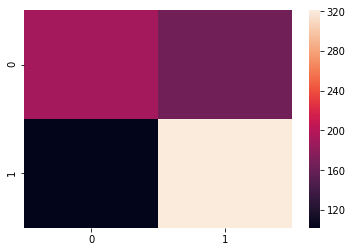

In [23]:
import seaborn as sn
sn.heatmap(conf_matrix)
#light is better

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predictions))

              precision    recall  f1-score   support

           0       0.65      0.54      0.59       357
           1       0.66      0.76      0.71       423

   micro avg       0.66      0.66      0.66       780
   macro avg       0.66      0.65      0.65       780
weighted avg       0.66      0.66      0.65       780



In [25]:
check_df = pd.DataFrame([X_test.index,y_test,y_predictions],index=['matchID','Actual','Predicted']).transpose()
check_df.replace([0,1],["Dire","Radiant"],inplace=True)
check_df["Correct?"] = check_df['Actual'] == check_df['Predicted']
check_df.set_index('matchID',inplace=True)
check_df.sort_index(ascending=False,inplace=True)
check_df.head(10)

,Actual,Predicted,Correct?
matchID,,,
4925639869,Radiant,Radiant,True
4903566049,Dire,Radiant,False
4900754747,Dire,Radiant,False
4898695323,Dire,Dire,True
4896040961,Radiant,Radiant,True
4895769989,Radiant,Radiant,True
4895561660,Radiant,Radiant,True
4895310107,Dire,Dire,True
4894403418,Dire,Dire,True


In [26]:
xgb_model.feature_importances_

array([0.04411765, 0.03676471, 0.04901961, 0.04166667, 0.07843138,
       0.25490198, 0.02205882, 0.06617647, 0.07843138, 0.02696078,
       0.06127451, 0.04166667, 0.19362745, 0.00490196, 0.        ],
      dtype=float32)

In [27]:
X_train.head()

,dire_pick_1,dire_pick_2,dire_pick_3,dire_pick_4,dire_pick_5,dire_team_id,patch,radiant_pick_1,radiant_pick_2,radiant_pick_3,radiant_pick_4,radiant_pick_5,radiant_team_id,fp_dire,fp_radiant
match_id,,,,,,,,,,,,,,,
3849876560,89,27,52,54,57,350190,32,87,16,20,11,102,2581813,1,0
3561561697,62,69,112,15,34,1951061,26,3,28,80,65,9,2626685,0,1
3364084016,65,89,111,16,61,2108395,25,41,68,23,53,99,3331948,1,0
3714669164,19,3,86,12,15,15,27,72,85,16,91,52,3,1,0
3682119944,51,11,27,65,109,543897,26,3,39,15,89,41,2581813,1,0


In [28]:
#Process of One Hot Encoding each pick into one "table" where each row has 5 1s and the rest 0s, to designate the 5 picked heroes
direp1 = pd.get_dummies(X_full['dire_pick_1'])
direp2 = pd.get_dummies(X_full['dire_pick_2'])
direp3 = pd.get_dummies(X_full['dire_pick_3'])
direp4 = pd.get_dummies(X_full['dire_pick_4'])
direp5 = pd.get_dummies(X_full['dire_pick_5'])

radp1 = pd.get_dummies(X_full['radiant_pick_1'])
radp2 = pd.get_dummies(X_full['radiant_pick_2'])
radp3 = pd.get_dummies(X_full['radiant_pick_3'])
radp4 = pd.get_dummies(X_full['radiant_pick_4'])
radp5 = pd.get_dummies(X_full['radiant_pick_5'])

In [29]:
direpall = direp1.add(direp2,fill_value=0)
direpall = direpall.add(direp3,fill_value=0)
direpall = direpall.add(direp4,fill_value=0)
direpall = direpall.add(direp5,fill_value=0)
direpall = direpall.add_prefix('dire_')

In [30]:
radpall = radp1.add(radp2,fill_value=0)
radpall = radpall.add(radp3,fill_value=0)
radpall = radpall.add(radp4,fill_value=0)
radpall = radpall.add(radp5,fill_value=0)
radpall = radpall.add_prefix('radiant_')

In [31]:
#verify every row has 5 1's and rest zeros. Each row should add up to 5.
for i in range(len(direpall)):
    if direpall.iloc[i].sum() != 5:
        print(f'error! at row {i}')

In [32]:
for i in range(len(radpall)):
    if radpall.iloc[i].sum() != 5:
        print(f'error! at row {i}')

In [33]:
radpall.shape

(5199, 117)

In [34]:
direpall.shape

(5199, 117)

In [35]:
#create a new dataframe to hold the OHE version:
X_full_OHE = X_full.copy()
X_full_OHE.head()

,dire_pick_1,dire_pick_2,dire_pick_3,dire_pick_4,dire_pick_5,dire_team_id,patch,radiant_pick_1,radiant_pick_2,radiant_pick_3,radiant_pick_4,radiant_pick_5,radiant_team_id,fp_dire,fp_radiant
match_id,,,,,,,,,,,,,,,
4865821968,106,2,57,46,26,1838315,41,97,8,64,111,19,2586976,1,0
4865712667,79,18,25,108,72,1838315,41,71,55,64,74,93,2586976,0,1
4861754075,71,106,112,99,54,1838315,41,96,79,18,57,36,1883502,1,0
4861607434,33,71,8,110,114,1838315,41,37,69,26,80,10,1883502,1,0
4861467475,83,46,101,85,54,1838315,41,18,121,71,110,50,1883502,0,1


In [36]:
X_full_OHE = pd.concat([X_full_OHE,direpall],axis=1,sort=False)
X_full_OHE = pd.concat([X_full_OHE,radpall],axis=1,sort=False)
X_full_OHE.drop(['dire_pick_1','dire_pick_2','dire_pick_3','dire_pick_4','dire_pick_5','radiant_pick_1','radiant_pick_2','radiant_pick_3','radiant_pick_4','radiant_pick_5'],axis=1, inplace=True)
X_full_OHE.head()

,dire_team_id,patch,radiant_team_id,fp_dire,fp_radiant,dire_1,dire_2,dire_3,dire_4,dire_5,...,radiant_109,radiant_110,radiant_111,radiant_112,radiant_113,radiant_114,radiant_119,radiant_120,radiant_121,radiant_129
match_id,,,,,,,,,,,,,,,,,,,,,
4865821968,1838315,41,2586976,1,0,0.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4865712667,1838315,41,2586976,0,1,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4861754075,1838315,41,1883502,1,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4861607434,1838315,41,1883502,1,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4861467475,1838315,41,1883502,0,1,0.0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [37]:
X_train_OHE, X_test_OHE, y_train_OHE, y_test_OHE = train_test_split(X_full_OHE, y_full, train_size=0.85, test_size=0.15, random_state = 42)

match_weight = X_train_OHE['patch']/41

log_model_OHE = LogisticRegression(random_state = 42,solver='lbfgs')
svc_model_OHE = SVC(random_state=42, kernel='rbf', gamma="scale")
xgb_model_OHE = xgb.XGBClassifier(seed=42)

log_model_OHE.fit(X_train_OHE, y_train_OHE)
y_predictions = log_model_OHE.predict(X_test_OHE)
print('Logistic Regression OneHotEncoded')
print(f'train.score: {log_model_OHE.score(X_train_OHE,y_train_OHE)}')
print(f'test.score:  {log_model_OHE.score(X_test_OHE,y_test_OHE)}')
print(f'f1:          {f1_score(y_test_OHE, y_predictions)}')
print('-'*12)

svc_model_OHE.fit(X_train_OHE, y_train_OHE)
y_predictions = svc_model_OHE.predict(X_test_OHE)
print('SVC model OneHotEncoded ')
print(f'train.score: {svc_model_OHE.score(X_train_OHE,y_train_OHE)}')
print(f'test.score:  {svc_model_OHE.score(X_test_OHE,y_test_OHE)}')
print(f'f1:          {f1_score(y_test_OHE, y_predictions)}')
print('-'*12)

xgb_model_OHE.fit(X_train_OHE, y_train_OHE)
y_predictions = xgb_model_OHE.predict(X_test_OHE)
print('XGB model OneHotEncoded no weight ')
print(f'train.score: {xgb_model_OHE.score(X_train_OHE,y_train_OHE)}')
print(f'test.score:  {xgb_model_OHE.score(X_test_OHE,y_test_OHE)}')
print(f'f1:          {f1_score(y_test_OHE, y_predictions)}')
print('-'*12)

xgb_model_OHE.fit(X_train_OHE, y_train_OHE,sample_weight = match_weight)
y_predictions = xgb_model_OHE.predict(X_test_OHE)
print('XGB model OneHotEncoded patch weighted')
print(f'train.score: {xgb_model_OHE.score(X_train_OHE,y_train_OHE)}')
print(f'test.score:  {xgb_model_OHE.score(X_test_OHE,y_test_OHE)}')
print(f'f1:          {f1_score(y_test_OHE, y_predictions)}')
print('-'*12)

Logistic Regression OneHotEncoded
train.score: 0.5842950893867391
test.score:  0.5743589743589743
f1:          0.6139534883720931
------------
SVC model OneHotEncoded 
train.score: 0.7083050463905861
test.score:  0.5641025641025641
f1:          0.6375266524520256
------------
XGB model OneHotEncoded no weight 
train.score: 0.6969902692916949
test.score:  0.6256410256410256
f1:          0.6805251641137854
------------
XGB model OneHotEncoded patch weighted
train.score: 0.695632496039828
test.score:  0.6371794871794871
f1:          0.6947141316073354
------------


In [38]:
confusion_matrix(y_test_OHE,y_predictions)

array([[175, 182],
       [101, 322]], dtype=int64)

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test_OHE,y_predictions))

              precision    recall  f1-score   support

           0       0.63      0.49      0.55       357
           1       0.64      0.76      0.69       423

   micro avg       0.64      0.64      0.64       780
   macro avg       0.64      0.63      0.62       780
weighted avg       0.64      0.64      0.63       780



In [40]:
# XGB_model predict needs the feature names in the predict function, the others don't.
# XGB_model_OHE has team picks one hot encoded so it is very long, with a ton of 0's
print(xgb_model.predict(pd.DataFrame([[12,103,50,49,13,29,26,16,54,52,76,23,45,0,1]], columns=X_test.columns)))
print(xgb_model_OHE.predict(pd.DataFrame([[29,26,45,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]], columns=X_test_OHE.columns)))
print(svc_model.predict([[12,103,50,49,13,29,26,16,54,52,76,23,45,0,1]]))
print(log_model.predict([[12,103,50,49,13,29,26,16,54,52,76,23,45,0,1]]))

[1]
[1]
[1]
[1]


In [41]:
xgb_model_OHE.feature_importances_

array([0.17691155, 0.04647676, 0.16191904, 0.0089955 , 0.        ,
       0.        , 0.        , 0.        , 0.0029985 , 0.        ,
       0.0029985 , 0.0029985 , 0.00749625, 0.        , 0.00749625,
       0.        , 0.        , 0.00149925, 0.        , 0.        ,
       0.01049475, 0.00449775, 0.        , 0.00749625, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01649175, 0.0029985 , 0.        , 0.        , 0.0029985 ,
       0.0029985 , 0.00749625, 0.0089955 , 0.        , 0.        ,
       0.00149925, 0.00149925, 0.        , 0.00149925, 0.        ,
       0.        , 0.00149925, 0.        , 0.        , 0.01349325,
       0.        , 0.        , 0.00149925, 0.00149925, 0.        ,
       0.        , 0.0149925 , 0.00149925, 0.00449775, 0.0029985 ,
       0.        , 0.        , 0.        , 0.005997  , 0.        ,
       0.        , 0.        , 0.0029985 , 0.01349325, 0.005997  ,
       0.        , 0.        , 0.0089955 , 0.005997  , 0.     

In [42]:
for each in xgb_model_OHE.feature_importances_:
    print(each)
#tons of 0s? data so sparse when OHE'd that it's essentially considering tons of hero picks irrelevant?

0.17691155
0.046476763
0.16191904
0.008995502
0.0
0.0
0.0
0.0
0.0029985008
0.0
0.0029985008
0.0029985008
0.0074962517
0.0
0.0074962517
0.0
0.0
0.0014992504
0.0
0.0
0.010494753
0.004497751
0.0
0.0074962517
0.0
0.0
0.0
0.0
0.0
0.0
0.016491754
0.0029985008
0.0
0.0
0.0029985008
0.0029985008
0.0074962517
0.008995502
0.0
0.0
0.0014992504
0.0014992504
0.0
0.0014992504
0.0
0.0
0.0014992504
0.0
0.0
0.013493253
0.0
0.0
0.0014992504
0.0014992504
0.0
0.0
0.014992503
0.0014992504
0.004497751
0.0029985008
0.0
0.0
0.0
0.0059970017
0.0
0.0
0.0
0.0029985008
0.013493253
0.0059970017
0.0
0.0
0.008995502
0.0059970017
0.0
0.004497751
0.0029985008
0.0014992504
0.0
0.0029985008
0.014992503
0.0059970017
0.008995502
0.0
0.0
0.0
0.0059970017
0.0014992504
0.0
0.013493253
0.0
0.0014992504
0.0
0.004497751
0.0
0.0
0.0
0.0059970017
0.004497751
0.0059970017
0.0029985008
0.0
0.004497751
0.0074962517
0.0014992504
0.0
0.0
0.0
0.0
0.0014992504
0.0059970017
0.0
0.0059970017
0.0
0.004497751
0.0
0.0014992504
0.0
0.001499250

In [43]:
for each_col in X_full_OHE.columns:
    print(each_col)

dire_team_id
patch
radiant_team_id
fp_dire
fp_radiant
dire_1
dire_2
dire_3
dire_4
dire_5
dire_6
dire_7
dire_8
dire_9
dire_10
dire_11
dire_12
dire_13
dire_14
dire_15
dire_16
dire_17
dire_18
dire_19
dire_20
dire_21
dire_22
dire_23
dire_25
dire_26
dire_27
dire_28
dire_29
dire_30
dire_31
dire_32
dire_33
dire_34
dire_35
dire_36
dire_37
dire_38
dire_39
dire_40
dire_41
dire_42
dire_43
dire_44
dire_45
dire_46
dire_47
dire_48
dire_49
dire_50
dire_51
dire_52
dire_53
dire_54
dire_55
dire_56
dire_57
dire_58
dire_59
dire_60
dire_61
dire_62
dire_63
dire_64
dire_65
dire_66
dire_67
dire_68
dire_69
dire_70
dire_71
dire_72
dire_73
dire_74
dire_75
dire_76
dire_77
dire_78
dire_79
dire_80
dire_81
dire_82
dire_83
dire_84
dire_85
dire_86
dire_87
dire_88
dire_89
dire_90
dire_91
dire_92
dire_93
dire_94
dire_95
dire_96
dire_97
dire_98
dire_99
dire_100
dire_101
dire_102
dire_103
dire_104
dire_105
dire_106
dire_107
dire_108
dire_109
dire_110
dire_111
dire_112
dire_113
dire_114
dire_119
dire_120
dire_121
dire_129


In [44]:
for each in hero_names_only:
    print(each)

Anti-Mage
Axe
Bane
Bloodseeker
Crystal Maiden
Drow Ranger
Earthshaker
Juggernaut
Mirana
Morphling
Shadow Fiend
Phantom Lancer
Puck
Pudge
Razor
Sand King
Storm Spirit
Sven
Tiny
Vengeful Spirit
Windranger
Zeus
Kunkka
Lina
Lion
Shadow Shaman
Slardar
Tidehunter
Witch Doctor
Lich
Riki
Enigma
Tinker
Sniper
Necrophos
Warlock
Beastmaster
Queen of Pain
Venomancer
Faceless Void
Wraith King
Death Prophet
Phantom Assassin
Pugna
Templar Assassin
Viper
Luna
Dragon Knight
Dazzle
Clockwerk
Leshrac
Nature's Prophet
Lifestealer
Dark Seer
Clinkz
Omniknight
Enchantress
Huskar
Night Stalker
Broodmother
Bounty Hunter
Weaver
Jakiro
Batrider
Chen
Spectre
Ancient Apparition
Doom
Ursa
Spirit Breaker
Gyrocopter
Alchemist
Invoker
Silencer
Outworld Devourer
Lycan
Brewmaster
Shadow Demon
Lone Druid
Chaos Knight
Meepo
Treant Protector
Ogre Magi
Undying
Rubick
Disruptor
Nyx Assassin
Naga Siren
Keeper of the Light
Io
Visage
Slark
Medusa
Troll Warlord
Centaur Warrunner
Magnus
Timbersaw
Bristleback
Tusk
Skywrath Mage
Ab

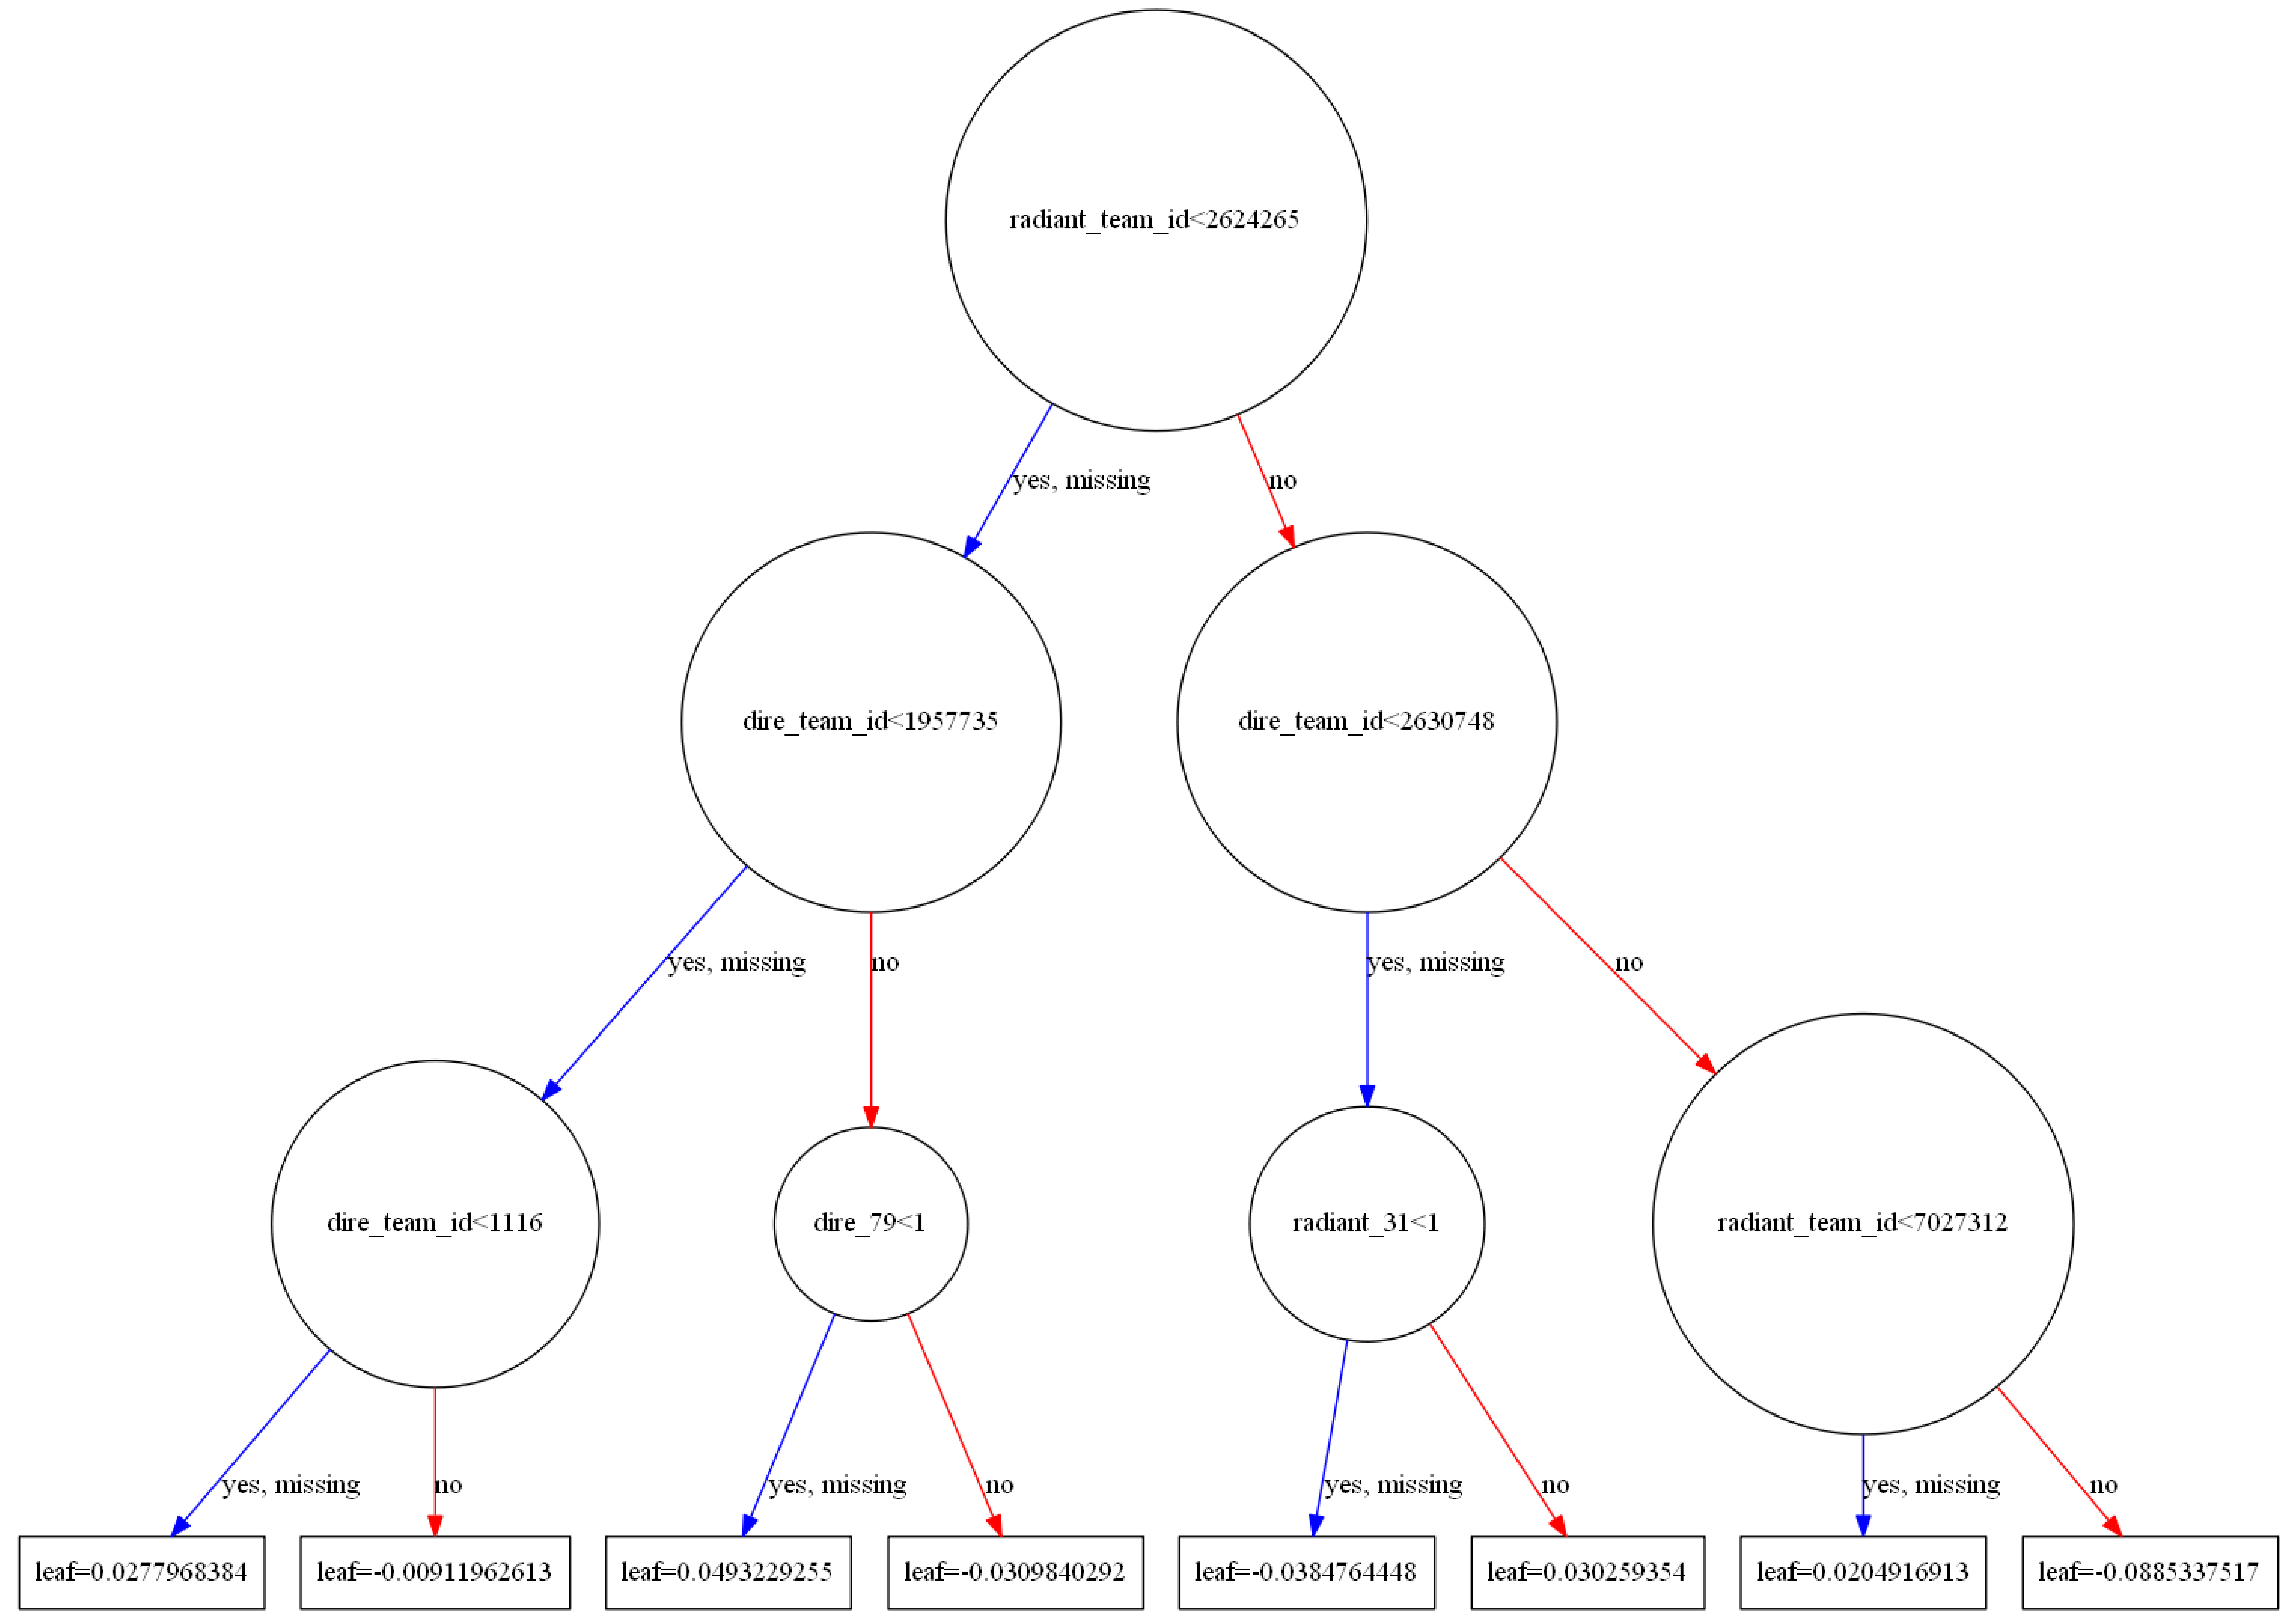

In [45]:
# uncomment to create a decision tree image.
# only works with graphviz
from xgboost import plot_tree
import matplotlib.pyplot as plt
xgb.plot_tree(xgb_model_OHE,num_trees=6)
fig = plt.gcf()
fig.set_size_inches(150, 100)
fig.savefig('tree.png')

<function matplotlib.pyplot.show(*args, **kw)>

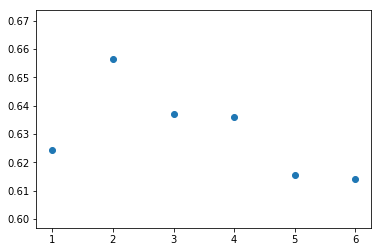

In [46]:
#testing parameters on first non_OHE'd data set
scores = []
for depth_num in range(1,7):
    xgb_model_testing = xgb.XGBClassifier(seed=42,max_depth=depth_num,n_estimators=136)
    xgb_model_testing.fit(X_train, y_train,sample_weight = match_weight)
    scores.append(xgb_model_testing.score(X_test,y_test))
    
plt.scatter(range(1,7),scores)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

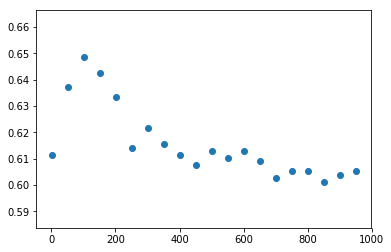

In [47]:
#testing parameters on initial non-OHE data set
scores = []
for estimators in range(1,1001,50):
    xgb_model_testing = xgb.XGBClassifier(seed=42,max_depth=3,n_estimators=estimators)
    xgb_model_testing.fit(X_train, y_train,sample_weight = match_weight)
    scores.append(xgb_model_testing.score(X_test,y_test))
    
plt.scatter(range(1,1001,50),scores)
plt.show

In [48]:
#narrow down best combination of max_depth and n_estimator

max_score = 0
best_depth = 0
best_estimator = 0
# for depth_num in range(1,11):  #coarse adjustment
#     for estimators in range(1,1001,100):
for depth_num in range(2,4):  #fine adjustment
    for estimators in range(130,140,1):
        xgb_model_testing = xgb.XGBClassifier(seed=80847,max_depth=depth_num,n_estimators=estimators)
        xgb_model_testing.fit(X_train, y_train,sample_weight = match_weight)
        if xgb_model_testing.score(X_test,y_test) > max_score:
            max_score = xgb_model_testing.score(X_test,y_test)
            best_depth = depth_num
            best_estimator = estimators
        print(best_depth,best_estimator,max_score)
        print(f'currently at {depth_num}, {estimators}')

2 130 0.65
currently at 2, 130
2 130 0.65
currently at 2, 131
2 132 0.6512820512820513
currently at 2, 132
2 132 0.6512820512820513
currently at 2, 133
2 134 0.6525641025641026
currently at 2, 134
2 135 0.6538461538461539
currently at 2, 135
2 136 0.6564102564102564
currently at 2, 136
2 136 0.6564102564102564
currently at 2, 137
2 136 0.6564102564102564
currently at 2, 138
2 136 0.6564102564102564
currently at 2, 139
2 136 0.6564102564102564
currently at 3, 130
2 136 0.6564102564102564
currently at 3, 131
2 136 0.6564102564102564
currently at 3, 132
2 136 0.6564102564102564
currently at 3, 133
2 136 0.6564102564102564
currently at 3, 134
2 136 0.6564102564102564
currently at 3, 135
2 136 0.6564102564102564
currently at 3, 136
2 136 0.6564102564102564
currently at 3, 137
2 136 0.6564102564102564
currently at 3, 138
2 136 0.6564102564102564
currently at 3, 139


In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

n_estimators = [180, 190, 200, 210, 220, 230] #tested in the 130 range before, this higher range came out better... WHY?
max_depth = [1, 2, 3]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=80)
grid_search = GridSearchCV(xgb_model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   46.7s finished


Best: -0.649795 using {'max_depth': 2, 'n_estimators': 200}
-0.655124 (0.012693) with: {'max_depth': 1, 'n_estimators': 180}
-0.655183 (0.012784) with: {'max_depth': 1, 'n_estimators': 190}
-0.654950 (0.012819) with: {'max_depth': 1, 'n_estimators': 200}
-0.654934 (0.012931) with: {'max_depth': 1, 'n_estimators': 210}
-0.654690 (0.013047) with: {'max_depth': 1, 'n_estimators': 220}
-0.654674 (0.013326) with: {'max_depth': 1, 'n_estimators': 230}
-0.649914 (0.016031) with: {'max_depth': 2, 'n_estimators': 180}
-0.649931 (0.016449) with: {'max_depth': 2, 'n_estimators': 190}
-0.649795 (0.016565) with: {'max_depth': 2, 'n_estimators': 200}
-0.649993 (0.016465) with: {'max_depth': 2, 'n_estimators': 210}
-0.650205 (0.016564) with: {'max_depth': 2, 'n_estimators': 220}
-0.650241 (0.016364) with: {'max_depth': 2, 'n_estimators': 230}
-0.653269 (0.018422) with: {'max_depth': 3, 'n_estimators': 180}
-0.652921 (0.017933) with: {'max_depth': 3, 'n_estimators': 190}
-0.653699 (0.018533) with: {'m

In [45]:
#One Hot Encode the team ID's too.

#this is a really terrible variable name. I should fix it. later.
X_full_OHE_OHE = X_full_OHE.copy()
direteam_dummies = pd.get_dummies(X_full_OHE_OHE['dire_team_id'], prefix="dire_team")
radteam_dummies = pd.get_dummies(X_full_OHE_OHE['radiant_team_id'],prefix="rad_team")
X_full_OHE_OHE = pd.concat([X_full_OHE_OHE,direteam_dummies],axis=1,sort=False)
X_full_OHE_OHE = pd.concat([X_full_OHE_OHE,radteam_dummies],axis=1,sort=False)
X_full_OHE_OHE = X_full_OHE_OHE.drop(['dire_team_id','radiant_team_id'],1)
X_full_OHE_OHE.head()

,patch,fp_dire,fp_radiant,dire_1,dire_2,dire_3,dire_4,dire_5,dire_6,dire_7,...,rad_team_7118594,rad_team_7119039,rad_team_7119077,rad_team_7119284,rad_team_7119388,rad_team_7137328,rad_team_7203342,rad_team_7220281,rad_team_7225724,rad_team_7247587
match_id,,,,,,,,,,,,,,,,,,,,,
4865821968,41,1,0,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4865712667,41,0,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4861754075,41,1,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4861607434,41,1,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4861467475,41,0,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
print(direteam_dummies.shape, radteam_dummies.shape)

(5199, 259) (5199, 261)


In [47]:
X_train_OHE_OHE, X_test_OHE_OHE, y_train_OHE_OHE, y_test_OHE_OHE = train_test_split(X_full_OHE_OHE, y_full, train_size=0.85, random_state = 42)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [48]:
log_model_OHE_OHE = LogisticRegression(random_state = 42,solver='lbfgs')
svc_model_OHE_OHE = SVC(random_state=42, kernel='rbf', gamma="scale")
xgb_model_OHE_OHE = xgb.XGBClassifier(seed=42)

log_model_OHE_OHE.fit(X_train_OHE_OHE, y_train_OHE_OHE)
y_predictions = log_model_OHE_OHE.predict(X_test_OHE_OHE)
print('Logistic Regression OneHotEncoded')
print(f'train.score: {log_model_OHE_OHE.score(X_train_OHE_OHE,y_train_OHE_OHE)}')
print(f'test.score:  {log_model_OHE_OHE.score(X_test_OHE_OHE,y_test_OHE_OHE)}')
print(f'f1:          {f1_score(y_test_OHE_OHE, y_predictions)}')
print('-'*12)

svc_model_OHE_OHE.fit(X_train_OHE_OHE, y_train_OHE_OHE)
y_predictions = svc_model_OHE_OHE.predict(X_test_OHE_OHE)
print('SVC model OneHotEncoded ')
print(f'train.score: {svc_model_OHE_OHE.score(X_train_OHE_OHE,y_train_OHE_OHE)}')
print(f'test.score:  {svc_model_OHE_OHE.score(X_test_OHE_OHE,y_test_OHE_OHE)}')
print(f'f1:          {f1_score(y_test_OHE_OHE, y_predictions)}')
print('-'*12)

xgb_model_OHE_OHE.fit(X_train_OHE_OHE, y_train_OHE_OHE)
y_predictions = xgb_model_OHE_OHE.predict(X_test_OHE_OHE)
print('XGB model OneHotEncoded no weight ')
print(f'train.score: {xgb_model_OHE_OHE.score(X_train_OHE_OHE,y_train_OHE_OHE)}')
print(f'test.score:  {xgb_model_OHE_OHE.score(X_test_OHE_OHE,y_test_OHE_OHE)}')
print(f'f1:          {f1_score(y_test_OHE_OHE, y_predictions)}')
print('-'*12)

xgb_model_OHE_OHE.fit(X_train_OHE_OHE, y_train_OHE_OHE,sample_weight = match_weight)
y_predictions = xgb_model_OHE_OHE.predict(X_test_OHE_OHE)
print('XGB model OneHotEncoded patch weighted')
print(f'train.score: {xgb_model_OHE_OHE.score(X_train_OHE_OHE,y_train_OHE_OHE)}')
print(f'test.score:  {xgb_model_OHE_OHE.score(X_test_OHE_OHE,y_test_OHE_OHE)}')
print(f'f1:          {f1_score(y_test_OHE_OHE, y_predictions)}')
print('-'*12)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Logistic Regression OneHotEncoded
train.score: 0.7067209775967414
test.score:  0.6256410256410256
f1:          0.6548463356973995
------------
SVC model OneHotEncoded 
train.score: 0.5374519121973297
test.score:  0.5423076923076923
f1:          0.7032418952618454
------------
XGB model OneHotEncoded no weight 
train.score: 0.7006109979633401
test.score:  0.6243589743589744
f1:          0.6886291179596175
------------
XGB model OneHotEncoded patch weighted
train.score: 0.6960850871237837
test.score:  0.6166666666666667
f1:          0.6822529224229543
------------


In [49]:
xgb_model_OHE_OHE.feature_importances_

array([0.09001637, 0.01145663, 0.        , 0.        , 0.        ,
       0.00654664, 0.        , 0.        , 0.        , 0.        ,
       0.00981997, 0.        , 0.01636661, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00818331, 0.00163666,
       0.00818331, 0.00490998, 0.        , 0.        , 0.        ,
       0.00490998, 0.        , 0.        , 0.00818331, 0.        ,
       0.00163666, 0.00327332, 0.00654664, 0.        , 0.01472995,
       0.00327332, 0.        , 0.        , 0.        , 0.00163666,
       0.        , 0.        , 0.        , 0.00490998, 0.00654664,
       0.        , 0.        , 0.01472995, 0.        , 0.        ,
       0.        , 0.        , 0.00163666, 0.00163666, 0.00163666,
       0.00163666, 0.00654664, 0.        , 0.        , 0.        ,
       0.        , 0.00163666, 0.        , 0.        , 0.00327332,
       0.00327332, 0.00818331, 0.00490998, 0.        , 0.        ,
       0.00490998, 0.        , 0.        , 0.00490998, 0.     

In [50]:
zero = 0
for i in xgb_model_OHE_OHE.feature_importances_:
    if i == 0:
        zero += 1
print(f'{zero} in {len(xgb_model_OHE_OHE.feature_importances_)} = {zero/len(xgb_model_OHE_OHE.feature_importances_)*100}%')

625 in 757 = 82.56274768824306%


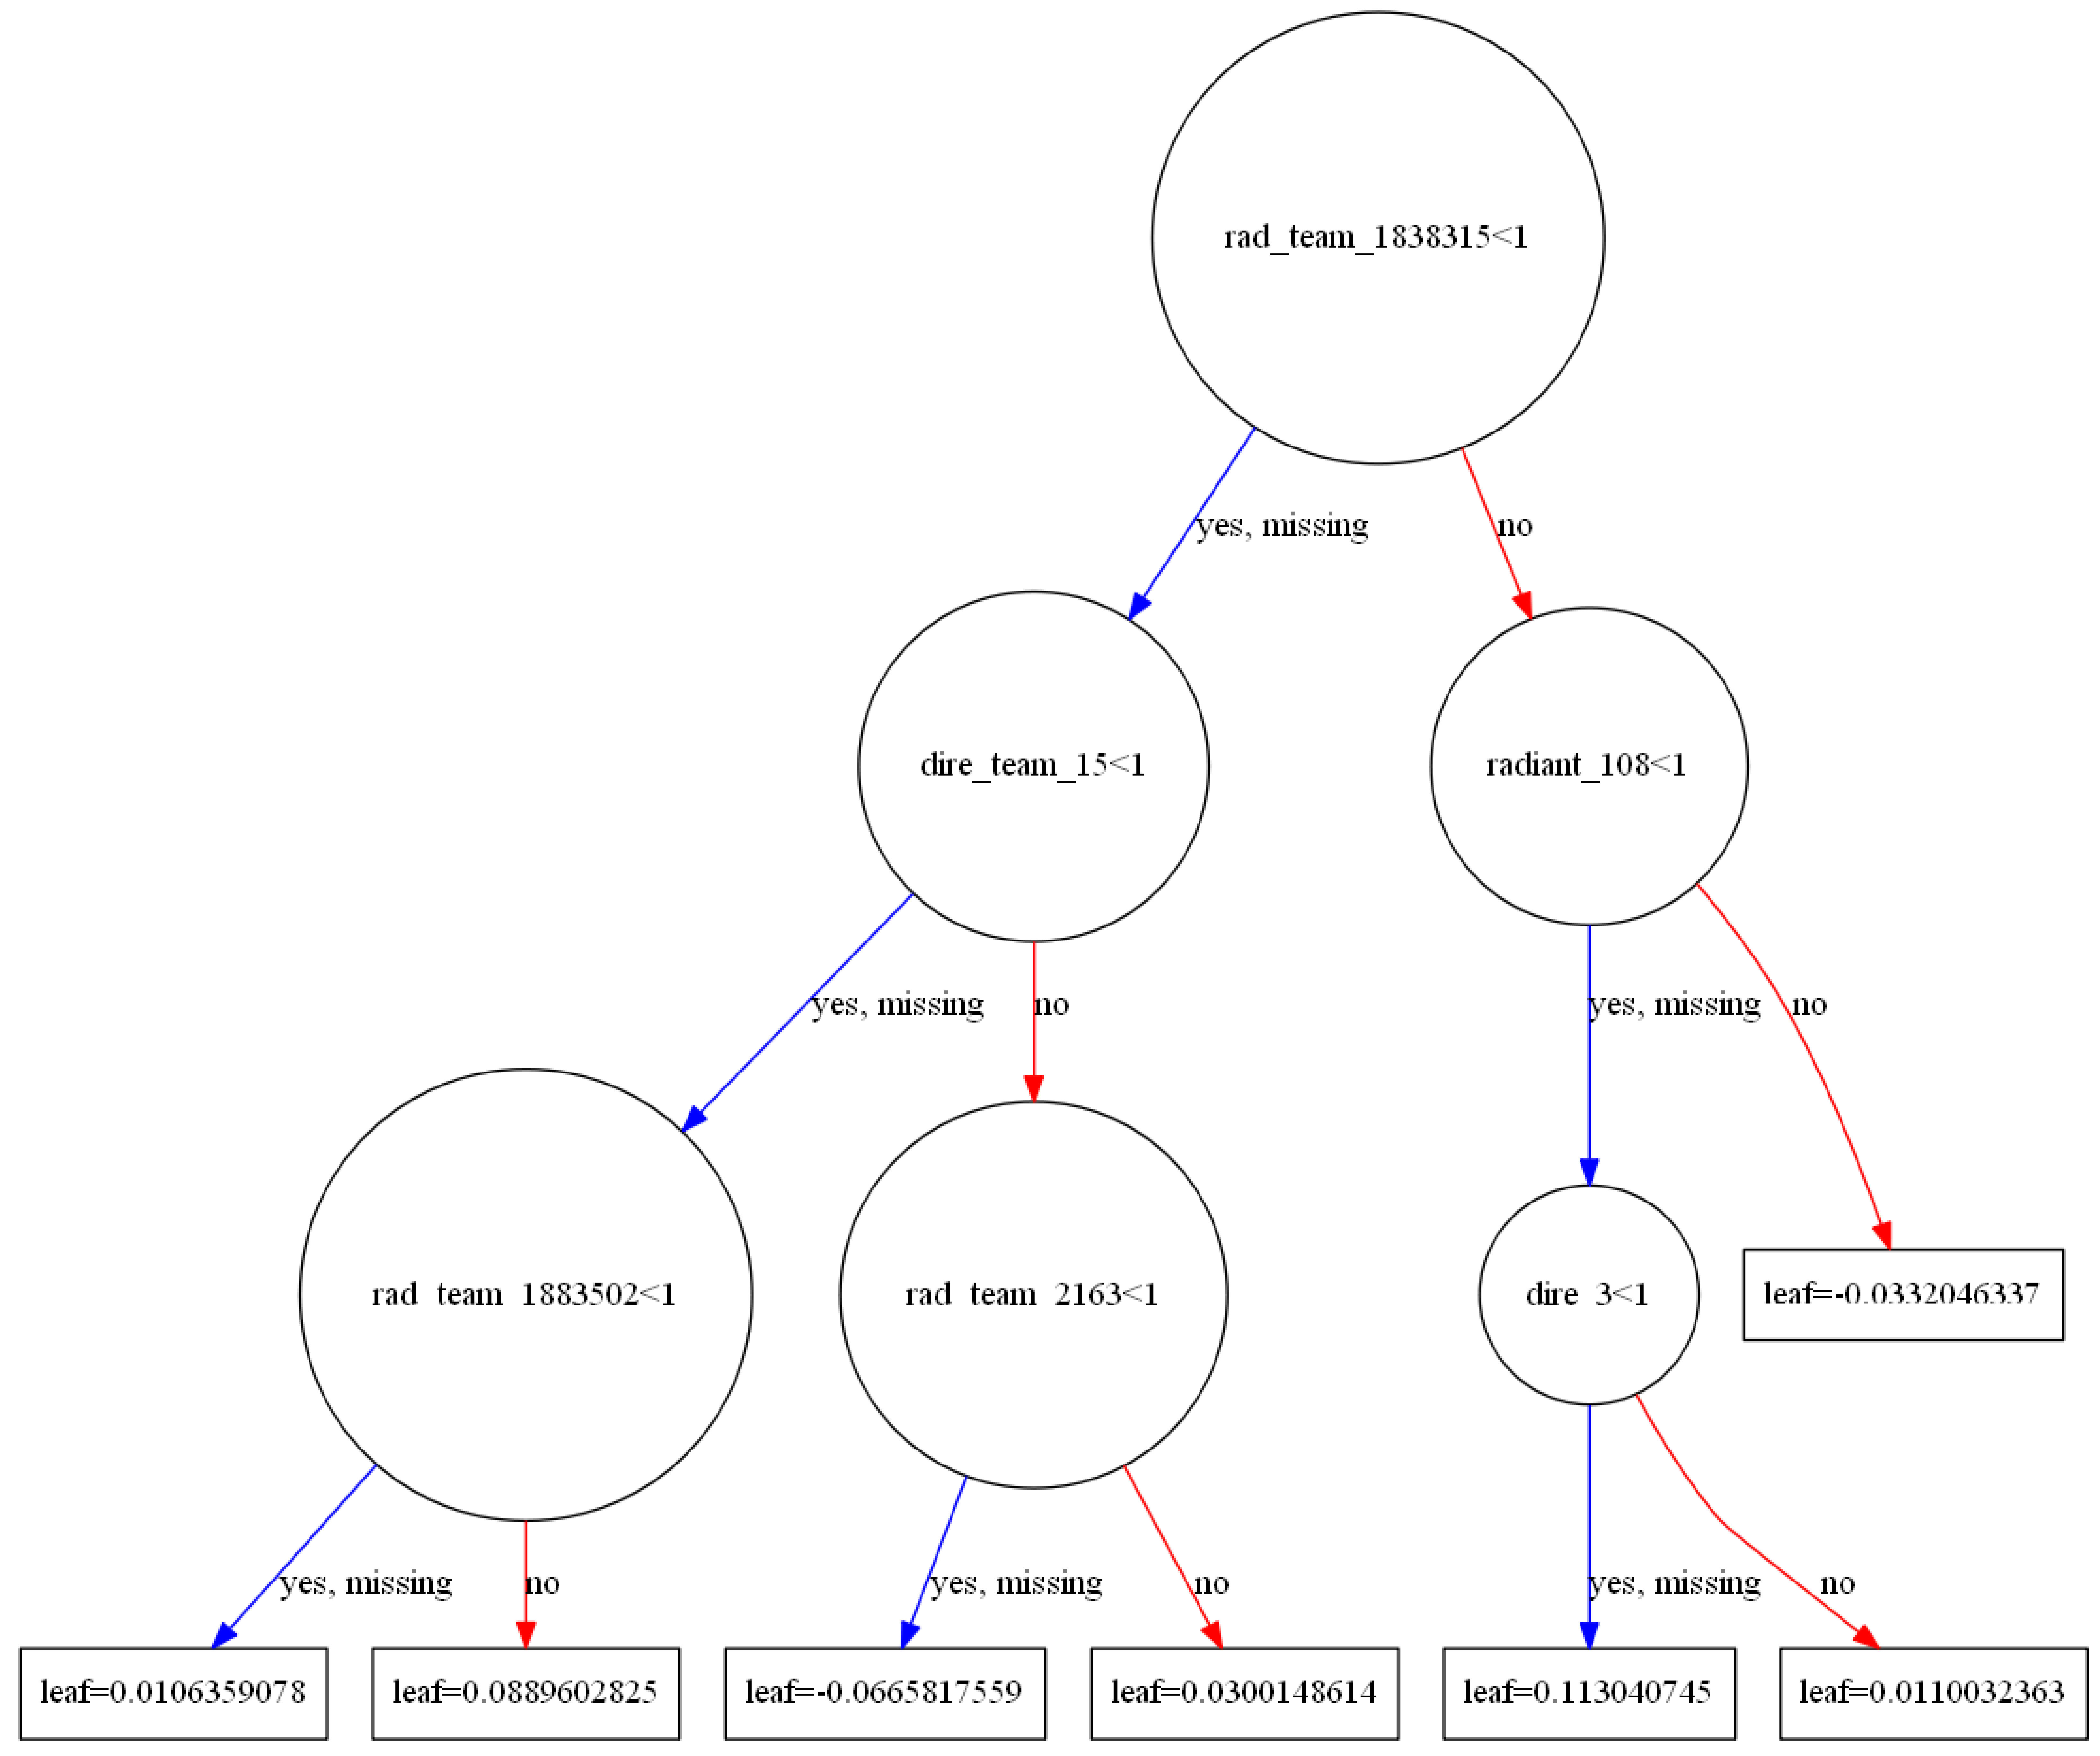

In [60]:
#EVEN MORE FREAKING 0's!

xgb.plot_tree(xgb_model_OHE_OHE)
fig = plt.gcf()
fig.set_size_inches(150, 100)
fig.savefig('tree2.png')

In [ ]:
#Making all the decisions based on team IDs.

In [61]:
#testing team_id and hero picks both One Hot Encoded, testing for best depth num with default n_estimators
scores = []
for depth_num in range(1,21,2):
    xgb_model_testing = xgb.XGBClassifier(seed=42,max_depth=depth_num)
    xgb_model_testing.fit(X_train_OHE_OHE, y_train_OHE_OHE,sample_weight = match_weight)
    scores.append(xgb_model_testing.score(X_test_OHE_OHE,y_test_OHE_OHE))
    print(f'{depth_num} done')
plt.scatter(range(1,21,2),scores)
plt.show

1 done
3 done
5 done
7 done
9 done
11 done
13 done


KeyboardInterrupt: 

In [ ]:
#testing best n_estimators with depth 13 from previous result
from datetime import datetime
scores = []
for estimators in range(1,1001,50):
    starttime = datetime.now()
    xgb_model_testing = xgb.XGBClassifier(seed=42,max_depth=13,n_estimators=estimators)
    xgb_model_testing.fit(X_train, y_train,sample_weight = match_weight)
    test_score = xgb_model_testing.score(X_test,y_test)
    scores.append(test_score)
    endtime = datetime.now()
    print(f'Estimator # {estimators} done, took {endtime-starttime} with score of {test_score}')
    
plt.scatter(range(1,1001,50),scores)
plt.show

In [77]:
n_estimators = [1,50,100,150,200]
max_depth = [3,5,7,9,11]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=80)
grid_search = GridSearchCV(xgb_model_OHE_OHE, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train_OHE_OHE, y_train_OHE_OHE)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 46.6min


KeyboardInterrupt: 

In [155]:
#new dataset only looking at games between the TI invitees. 18 teams have to be on both sides of the match.
#unfortunately cuts data down from over 5000 to 1679 rows.
ti_invites = [1838315, 1883502, 726228, 39, 2163, 15, 350190,6214973,2108395, 2586976, 111474, 2626685, 6209804, 543897, 36, 7203342, 2672298, 1375614]
data_df_new = data_df.copy()
data_df_new = data_df_new[(data_df_new['dire_team_id'].isin(ti_invites)) & (data_df_new['radiant_team_id'].isin(ti_invites))]
y_full_1 = data_df_new['winner']
le = preprocessing.LabelEncoder()
le.fit(y_full_1)
y_full_1 = le.transform(y_full_1)

X_full_1 = X_full_OHE.copy()
X_full_1 = X_full_1[(X_full_1['dire_team_id'].isin(ti_invites)) & (X_full_1['radiant_team_id'].isin(ti_invites))]
direteam_dummies = pd.get_dummies(X_full_1['dire_team_id'], prefix="dire_team")
radteam_dummies = pd.get_dummies(X_full_1['radiant_team_id'],prefix="rad_team")
X_full_1 = pd.concat([X_full_1,direteam_dummies],axis=1,sort=False)
X_full_1 = pd.concat([X_full_1,radteam_dummies],axis=1,sort=False)
X_full_1 = X_full_1.drop(['dire_team_id','radiant_team_id'],1)
X_full_1

,patch,fp_dire,fp_radiant,dire_1,dire_2,dire_3,dire_4,dire_5,dire_6,dire_7,...,rad_team_726228,rad_team_1375614,rad_team_1838315,rad_team_1883502,rad_team_2108395,rad_team_2586976,rad_team_2626685,rad_team_2672298,rad_team_6209804,rad_team_6214973
match_id,,,,,,,,,,,,,,,,,,,,,
4865821968,41,1,0,0.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4865712667,41,0,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4861754075,41,1,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4861607434,41,1,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4861467475,41,0,1,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4857772290,41,0,1,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4857623860,41,0,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4806947177,41,1,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4806839879,41,0,1,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [52]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_full_1, y_full_1, train_size=0.85, test_size = 0.15, random_state = 42)

log_model_1 = LogisticRegression(random_state = 42,solver='lbfgs')
svc_model_1 = SVC(random_state=42, kernel='rbf',gamma="scale")
xgb_model_1 = xgb.XGBClassifier(seed=42)

log_model_1.fit(X_train_1, y_train_1)
y_predictions = log_model_1.predict(X_test_1)
print('Logistic Regression onlyTIteams')
print(f'train.score: {log_model_1.score(X_train_1,y_train_1)}')
print(f'test.score:  {log_model_1.score(X_test_1,y_test_1)}')
print(f'f1:          {f1_score(y_test_1, y_predictions)}')
print('-'*12)

svc_model_1.fit(X_train_1, y_train_1)
y_predictions = svc_model_1.predict(X_test_1)
print('SVC model onlyTIteams ')
print(f'train.score: {svc_model_1.score(X_train_1,y_train_1)}')
print(f'test.score:  {svc_model_1.score(X_test_1,y_test_1)}')
print(f'f1:          {f1_score(y_test_1, y_predictions)}')
print('-'*12)

xgb_model_1.fit(X_train_1, y_train_1)
y_predictions = xgb_model_1.predict(X_test_1)
print('XGB model onlyTIteams no weight ')
print(f'train.score: {xgb_model_1.score(X_train_1,y_train_1)}')
print(f'test.score:  {xgb_model_1.score(X_test_1,y_test_1)}')
print(f'f1:          {f1_score(y_test_1, y_predictions)}')
print('-'*12)

xgb_model_1.fit(X_train_1, y_train_1,sample_weight = match_weight)
y_predictions = xgb_model_1.predict(X_test_1)
print('XGB model onlyTIteams patch weighted')
print(f'train.score: {xgb_model_1.score(X_train_1,y_train_1)}')
print(f'test.score:  {xgb_model_1.score(X_test_1,y_test_1)}')
print(f'f1:          {f1_score(y_test_1, y_predictions)}')
print('-'*12)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Logistic Regression onlyTIteams
train.score: 0.7140854940434478
test.score:  0.5753968253968254
f1:          0.624561403508772
------------
SVC model onlyTIteams 
train.score: 0.5290819901892081
test.score:  0.5833333333333334
f1:          0.7368421052631579
------------
XGB model onlyTIteams no weight 
train.score: 0.7708479327259986
test.score:  0.5873015873015873
f1:          0.6413793103448275
------------
XGB model onlyTIteams patch weighted
train.score: 0.7582340574632095
test.score:  0.6111111111111112
f1:          0.6733333333333333
------------


max_depth 3 and n_estimator 1 done, took 0:00:00.063417 with score of 0.5833333333333334
max_depth 3 and n_estimator 25 done, took 0:00:00.473691 with score of 0.5912698412698413
max_depth 3 and n_estimator 50 done, took 0:00:00.631819 with score of 0.5873015873015873
max_depth 3 and n_estimator 100 done, took 0:00:01.123503 with score of 0.6031746031746031
max_depth 3 and n_estimator 125 done, took 0:00:01.346096 with score of 0.5952380952380952
max_depth 3 and n_estimator 150 done, took 0:00:01.618788 with score of 0.5992063492063492
max_depth 4 and n_estimator 1 done, took 0:00:00.120505 with score of 0.5436507936507936
max_depth 4 and n_estimator 25 done, took 0:00:00.451798 with score of 0.6111111111111112
max_depth 4 and n_estimator 50 done, took 0:00:00.746912 with score of 0.626984126984127
max_depth 4 and n_estimator 100 done, took 0:00:01.594328 with score of 0.5793650793650794
max_depth 4 and n_estimator 125 done, took 0:00:01.781731 with score of 0.5992063492063492
max_dept

<function matplotlib.pyplot.show(*args, **kw)>

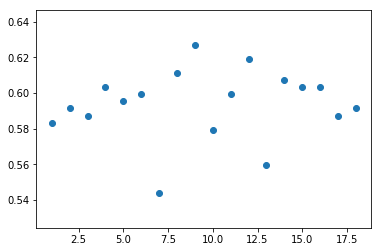

In [93]:
from datetime import datetime
scores = []
from sklearn.metrics import balanced_accuracy_score

for max_depth in range(3,6,1):
    for n_estimators in [1,25,50,100,125,150]:
        starttime = datetime.now()
        xgb_model_testing = xgb.XGBClassifier(random_state=43,max_depth=max_depth,n_estimators=n_estimators,subsample=0.8)
        xgb_model_testing.fit(X_train_1, y_train_1,sample_weight = match_weight)
        test_score = xgb_model_testing.score(X_test_1,y_test_1)
        scores.append(test_score)
        endtime = datetime.now()
        print(f'max_depth {max_depth} and n_estimator {n_estimators} done, took {endtime-starttime} with score of {test_score}')
        
plt.scatter(range(1,19),scores)
plt.show

In [101]:
import numpy as np
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [97]:
from datetime import datetime
from scipy.stats import uniform, randint
scores = []
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import RandomizedSearchCV

xgb_model_testing = xgb.XGBClassifier()
params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(25, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}
search = RandomizedSearchCV(xgb_model_testing, param_distributions=params, random_state=42, n_iter=200, cv=3, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X_train_1, y_train_1)

report_best_scores(search.cv_results_, 1)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  6.4min finished


NameError: name 'report_best_scores' is not defined

In [102]:
report_best_scores(search.cv_results_, 1)

Model with rank: 1
Mean validation score: 0.581 (std: 0.018)
Parameters: {'colsample_bytree': 0.976562270506935, 'gamma': 0.04424625102595975, 'learning_rate': 0.08879485872574355, 'max_depth': 2, 'n_estimators': 86, 'subsample': 0.7301321323053057}



In [108]:
params = {'colsample_bytree': 0.976562270506935, 'gamma': 0.04424625102595975, 'learning_rate': 0.08879485872574355, 'max_depth': 2, 'n_estimators': 86, 'subsample': 0.7301321323053057}
xgb_final = xgb.XGBClassifier(**params)
xgb_final.fit(X_train_1,y_train_1)
print(xgb_final.score(X_train_1,y_train_1))
print(xgb_final.score(X_test_1,y_test_1))

0.6888577435178697
0.5992063492063492


In [81]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

n_estimators = [1,25,50,100,125,150]
max_depth = [3,4,5,6]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(xgb_model_1, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train_1, y_train_1)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   41.6s finished


Best: 0.564121 using {'max_depth': 3, 'n_estimators': 50}
0.515067 (0.019374) with: {'max_depth': 3, 'n_estimators': 1}
0.562719 (0.021702) with: {'max_depth': 3, 'n_estimators': 25}
0.564121 (0.021020) with: {'max_depth': 3, 'n_estimators': 50}
0.548704 (0.031024) with: {'max_depth': 3, 'n_estimators': 100}
0.551507 (0.024941) with: {'max_depth': 3, 'n_estimators': 125}
0.552908 (0.031039) with: {'max_depth': 3, 'n_estimators': 150}
0.522775 (0.021894) with: {'max_depth': 4, 'n_estimators': 1}
0.550105 (0.029720) with: {'max_depth': 4, 'n_estimators': 25}
0.548003 (0.029006) with: {'max_depth': 4, 'n_estimators': 50}
0.560617 (0.037957) with: {'max_depth': 4, 'n_estimators': 100}
0.564121 (0.036540) with: {'max_depth': 4, 'n_estimators': 125}
0.564121 (0.036292) with: {'max_depth': 4, 'n_estimators': 150}
0.524177 (0.020986) with: {'max_depth': 5, 'n_estimators': 1}
0.560617 (0.020997) with: {'max_depth': 5, 'n_estimators': 25}
0.555711 (0.026459) with: {'max_depth': 5, 'n_estimators'

In [61]:
n_estimators = [35,40,45,50,55,60,65]
max_depth = [3,4,5]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=69)
grid_search = GridSearchCV(xgb_model_1, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train_1, y_train_1)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 8 folds for each of 21 candidates, totalling 168 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:   37.4s finished


Best: 0.566223 using {'max_depth': 3, 'n_estimators': 50}
0.558514 (0.020253) with: {'max_depth': 3, 'n_estimators': 35}
0.557814 (0.016374) with: {'max_depth': 3, 'n_estimators': 40}
0.562719 (0.021958) with: {'max_depth': 3, 'n_estimators': 45}
0.566223 (0.017170) with: {'max_depth': 3, 'n_estimators': 50}
0.561317 (0.013957) with: {'max_depth': 3, 'n_estimators': 55}
0.563420 (0.012449) with: {'max_depth': 3, 'n_estimators': 60}
0.565522 (0.015614) with: {'max_depth': 3, 'n_estimators': 65}
0.540294 (0.025686) with: {'max_depth': 4, 'n_estimators': 35}
0.547302 (0.024832) with: {'max_depth': 4, 'n_estimators': 40}
0.544499 (0.024221) with: {'max_depth': 4, 'n_estimators': 45}
0.548704 (0.020359) with: {'max_depth': 4, 'n_estimators': 50}
0.547302 (0.024554) with: {'max_depth': 4, 'n_estimators': 55}
0.557814 (0.025160) with: {'max_depth': 4, 'n_estimators': 60}
0.550806 (0.028332) with: {'max_depth': 4, 'n_estimators': 65}
0.554310 (0.022561) with: {'max_depth': 5, 'n_estimators': 3

In [72]:
from random import randint

n_estimators = [30, 40, 50, 60, 70, 80, 90]
max_depth = [3,4,5,6,7]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
for i in range(1,11):
    kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=randint(1,1000))
    grid_search = GridSearchCV(xgb_model_1, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold, verbose=0)
    grid_result = grid_search.fit(X_train_1, y_train_1)
    print(f'Best: {grid_result.best_score_} using {grid_result.best_params_}')

Best: 0.559915907498248 using {'max_depth': 6, 'n_estimators': 50}
Best: 0.5536089698668535 using {'max_depth': 5, 'n_estimators': 50}
Best: 0.5739313244569026 using {'max_depth': 3, 'n_estimators': 40}
Best: 0.5606166783461808 using {'max_depth': 6, 'n_estimators': 60}
Best: 0.5501051156271899 using {'max_depth': 6, 'n_estimators': 30}
Best: 0.5774351786965662 using {'max_depth': 3, 'n_estimators': 80}
Best: 0.5655220742817099 using {'max_depth': 6, 'n_estimators': 70}
Best: 0.5732305536089699 using {'max_depth': 7, 'n_estimators': 40}
Best: 0.5536089698668535 using {'max_depth': 5, 'n_estimators': 30}
Best: 0.5767344078486335 using {'max_depth': 6, 'n_estimators': 30}


In [106]:
n_estimators = [31,32,33,34,35,36,37,38,39]
max_depth = [6]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=80)
grid_search = GridSearchCV(xgb_model_1, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train_1, y_train_1)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   22.3s finished


Best: -0.679932 using {'max_depth': 6, 'n_estimators': 36}
-0.680688 (0.016327) with: {'max_depth': 6, 'n_estimators': 31}
-0.681062 (0.017780) with: {'max_depth': 6, 'n_estimators': 32}
-0.681133 (0.018266) with: {'max_depth': 6, 'n_estimators': 33}
-0.681227 (0.017784) with: {'max_depth': 6, 'n_estimators': 34}
-0.680017 (0.018510) with: {'max_depth': 6, 'n_estimators': 35}
-0.679932 (0.018332) with: {'max_depth': 6, 'n_estimators': 36}
-0.680097 (0.018877) with: {'max_depth': 6, 'n_estimators': 37}
-0.679956 (0.018804) with: {'max_depth': 6, 'n_estimators': 38}
-0.680484 (0.019641) with: {'max_depth': 6, 'n_estimators': 39}


In [86]:
xgb_model_1 = xgb.XGBClassifier(max_depth=6,n_estimators=50)
xgb_model_1.fit(X_train_1, y_train_1,sample_weight = match_weight)
y_predictions = xgb_model_1.predict(X_test_1)
print('XGB model OneHotEncoded TI_teams only patch weighted')
print(f'train.score: {xgb_model_1.score(X_train_1,y_train_1)}')
print(f'test.score:  {xgb_model_1.score(X_test_1,y_test_1)}')
print(f'f1:          {f1_score(y_test_1, y_predictions)}')
print('-'*12)

XGB model OneHotEncoded TI_teams only patch weighted
train.score: 0.8234057463209531
test.score:  0.5793650793650794
f1:          0.6442953020134228
------------


In [111]:
xgb_final

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.976562270506935, gamma=0.04424625102595975,
       learning_rate=0.08879485872574355, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=86, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.7301321323053057)

In [110]:
from sklearn.metrics import confusion_matrix
y_predictions = xgb_final.predict(X_test_1)
confusion_matrix(y_test_1,y_predictions)

array([[ 51,  54],
       [ 47, 100]], dtype=int64)

In [124]:
from keras.utils import to_categorical
to_categorical(y_test_1)

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.

In [89]:
from keras.models import Sequential
from keras.layers import Dense

k_model = Sequential()
k_model.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))
k_model.add(Dense(1000, activation='tanh'))
k_model.add(Dense(1000, activation='relu'))
k_model.add(Dense(1,activation='sigmoid'))

k_model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [90]:
k_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 100)               1600      
_________________________________________________________________
dense_54 (Dense)             (None, 1000)              101000    
_________________________________________________________________
dense_55 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 1001      
Total params: 1,104,601
Trainable params: 1,104,601
Non-trainable params: 0
_________________________________________________________________


In [91]:
k_model.fit(X_train, y_train, epochs=100, shuffle=True, verbose=1)

Epoch 1/100
4419/4419 [==============================] - 4s 815us/step - loss: 0.7927 - acc: 0.5508
Epoch 2/100
4419/4419 [==============================] - 3s 702us/step - loss: 0.7072 - acc: 0.5537
Epoch 3/100
4419/4419 [==============================] - 3s 677us/step - loss: 0.6858 - acc: 0.5798 1s - - ETA: 0s - loss: 0.6859 - acc: 0.5
Epoch 4/100
4419/4419 [==============================] - 3s 612us/step - loss: 0.6794 - acc: 0.5820
Epoch 5/100
4419/4419 [==============================] - 3s 650us/step - loss: 0.6796 - acc: 0.5798
Epoch 6/100
4419/4419 [==============================] - 3s 711us/step - loss: 0.6756 - acc: 0.5854
Epoch 7/100
4419/4419 [==============================] - 3s 599us/step - loss: 0.6746 - acc: 0.5811
Epoch 8/100
4419/4419 [==============================] - 3s 597us/step - loss: 0.6763 - acc: 0.5850
Epoch 9/100
4419/4419 [==============================] - 3s 605us/step - loss: 0.6767 - acc: 0.5924
Epoch 10/100
4419/4419 [==============================] - 3

In [96]:
y2_predictions = k_model.predict_classes(X_test)
y2_pred = [_[0] for _ in y2_predictions]
y2_pred

[1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,


In [97]:
check_df2 = pd.DataFrame([X_test.index,y_test,y2_pred],index=['matchID','Actual','Predicted']).transpose()

In [99]:
check_df2.head()

,matchID,Actual,Predicted
0,3354101340,1,1
1,4458230100,1,1
2,4757394304,0,0
3,3696233055,1,0
4,4591144225,1,1


In [101]:
len(check_df2.index)

780

In [106]:
corr = 0
for i in range(len(check_df2.index)):
    if check_df2.iloc[i]['Actual'] == check_df2.iloc[i]['Predicted']:
        corr += 1

57.692307692307686

In [141]:
corr = 0
for i in range(len(y_test)):
    if y_test[i]==1:
        corr += 1
print(f'If predict only radiant wins: {corr/len(y_test)*100}%')

If predict only radiant wins: 54.230769230769226%


In [145]:
#predicting winner simply based on team ranking.
#Team IDs sorted by highest tournament "points" over the course of the last year.
from random import random
ti_invites = [1838315, 1883502, 726228, 39, 2163, 15, 350190,6214973,2108395, 2586976, 111474, 2626685, 6209804, 543897, 36, 7203342, 2672298, 1375614]
correct = 0
for i in range(0,len(X_train.index)):
    if X_train.iloc[i]['dire_team_id'] not in ti_invites:
        if y_train[i] == 1:
            correct += 1
    elif X_train.iloc[i]['radiant_team_id'] not in ti_invites:
        if y_train[i] == 0:
            correct += 1
    elif ti_invites.index(X_train.iloc[i]['dire_team_id']) < ti_invites.index(X_train.iloc[i]['radiant_team_id']):
        if ti_invites.index(X_train.iloc[i]['dire_team_id']) >= 12: #if the "higher" ranked team is still a qualifier team (index >=12), coin flip the winner
            if round(random()) == y_train[i]:
                correct += 1
        else:
            if y_train[i] == 0:
                correct += 1
    else:
        if ti_invites.index(X_train.iloc[i]['radiant_team_id']) >= 12: #if the "higher" ranked team is still a qualifier team (index >=12), coin flip the winner
            if round(random()) == y_train[i]:
                correct += 1
        else:
            if y_train[i] == 1:
                correct += 1
print(f'TRAIN DATASET: if predict only the higher ranked team for direct invites, and random winner if both are qualifier teams: {correct/len(y_train)*100}%')

TRAIN DATASET: if predict only the higher ranked team for direct invites, and random winner if both are qualifier teams: 64.99207965603078%


In [148]:
from random import random
ti_invites = [1838315, 1883502, 726228, 39, 2163, 15, 350190,6214973,2108395, 2586976, 111474, 2626685, 6209804, 543897, 36, 7203342, 2672298, 1375614]
correct = 0
for i in range(0,len(X_test.index)):
    if X_test.iloc[i]['dire_team_id'] not in ti_invites:
        if y_test[i] == 1:
            correct += 1
    elif X_test.iloc[i]['radiant_team_id'] not in ti_invites:
        if y_test[i] == 0:
            correct += 1
    elif ti_invites.index(X_test.iloc[i]['dire_team_id']) < ti_invites.index(X_test.iloc[i]['radiant_team_id']):
        if ti_invites.index(X_test.iloc[i]['dire_team_id']) >= 12: #if the "higher" ranked team is still a qualifier team (index >=12), coin flip the winner
            if round(random()) == y_test[i]:
                correct += 1
        else:
            if y_test[i] == 0:
                correct += 1
    else:
        if ti_invites.index(X_test.iloc[i]['radiant_team_id']) >= 12: #if the "higher" ranked team is still a qualifier team (index >=12), coin flip the winner
            if round(random()) == y_test[i]:
                correct += 1
        else:
            if y_test[i] == 1:
                correct += 1
print(f'''If we just predict the higher ranked team to win every time:
      {correct/len(y_test)*100}%''')

If we just predict the higher ranked team to win every time:
      64.23076923076924%


In [112]:
import pickle

In [113]:
pickle.dump(xgb_final, open('model.pickle.dat','wb'))

In [114]:
load_model = pickle.load(open('model.pickle.dat','rb'))

In [116]:
load_model.predict(X_train_1)

array([0, 0, 1, ..., 1, 1, 0])

In [134]:
for _ in X_full_1.columns:
    print(_)

patch
fp_dire
fp_radiant
dire_1
dire_2
dire_3
dire_4
dire_5
dire_6
dire_7
dire_8
dire_9
dire_10
dire_11
dire_12
dire_13
dire_14
dire_15
dire_16
dire_17
dire_18
dire_19
dire_20
dire_21
dire_22
dire_23
dire_25
dire_26
dire_27
dire_28
dire_29
dire_30
dire_31
dire_32
dire_33
dire_34
dire_35
dire_36
dire_37
dire_38
dire_39
dire_40
dire_41
dire_42
dire_43
dire_44
dire_45
dire_46
dire_47
dire_48
dire_49
dire_50
dire_51
dire_52
dire_53
dire_54
dire_55
dire_56
dire_57
dire_58
dire_59
dire_60
dire_61
dire_62
dire_63
dire_64
dire_65
dire_66
dire_67
dire_68
dire_69
dire_70
dire_71
dire_72
dire_73
dire_74
dire_75
dire_76
dire_77
dire_78
dire_79
dire_80
dire_81
dire_82
dire_83
dire_84
dire_85
dire_86
dire_87
dire_88
dire_89
dire_90
dire_91
dire_92
dire_93
dire_94
dire_95
dire_96
dire_97
dire_98
dire_99
dire_100
dire_101
dire_102
dire_103
dire_104
dire_105
dire_106
dire_107
dire_108
dire_109
dire_110
dire_111
dire_112
dire_113
dire_114
dire_119
dire_120
dire_121
dire_129
radiant_1
radiant_2
radiant_3

In [124]:
X_train_1.head(1)

,patch,fp_dire,fp_radiant,dire_1,dire_2,dire_3,dire_4,dire_5,dire_6,dire_7,...,rad_team_726228,rad_team_1375614,rad_team_1838315,rad_team_1883502,rad_team_2108395,rad_team_2586976,rad_team_2626685,rad_team_2672298,rad_team_6209804,rad_team_6214973
match_id,,,,,,,,,,,,,,,,,,,,,
4390104060,40,1,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [133]:
X_train_1.columns

Index(['patch', 'fp_dire', 'fp_radiant', 'dire_1', 'dire_2', 'dire_3',
       'dire_4', 'dire_5', 'dire_6', 'dire_7',
       ...
       'rad_team_726228', 'rad_team_1375614', 'rad_team_1838315',
       'rad_team_1883502', 'rad_team_2108395', 'rad_team_2586976',
       'rad_team_2626685', 'rad_team_2672298', 'rad_team_6209804',
       'rad_team_6214973'],
      dtype='object', length=271)


In [137]:
xgb_final.predict(pd.DataFrame([[41, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],columns=['patch', 'fp_dire', 'fp_radiant', 'dire_1', 'dire_2', 'dire_3', 'dire_4', 'dire_5', 'dire_6', 'dire_7', 'dire_8', 'dire_9', 'dire_10', 'dire_11', 'dire_12', 'dire_13', 'dire_14', 'dire_15', 'dire_16', 'dire_17', 'dire_18', 'dire_19', 'dire_20', 'dire_21', 'dire_22', 'dire_23', 'dire_25', 'dire_26', 'dire_27', 'dire_28', 'dire_29', 'dire_30', 'dire_31', 'dire_32', 'dire_33', 'dire_34', 'dire_35', 'dire_36', 'dire_37', 'dire_38', 'dire_39', 'dire_40', 'dire_41', 'dire_42', 'dire_43', 'dire_44', 'dire_45', 'dire_46', 'dire_47', 'dire_48', 'dire_49', 'dire_50', 'dire_51', 'dire_52', 'dire_53', 'dire_54', 'dire_55', 'dire_56', 'dire_57', 'dire_58', 'dire_59', 'dire_60', 'dire_61', 'dire_62', 'dire_63', 'dire_64', 'dire_65', 'dire_66', 'dire_67', 'dire_68', 'dire_69', 'dire_70', 'dire_71', 'dire_72', 'dire_73', 'dire_74', 'dire_75', 'dire_76', 'dire_77', 'dire_78', 'dire_79', 'dire_80', 'dire_81', 'dire_82', 'dire_83', 'dire_84', 'dire_85', 'dire_86', 'dire_87', 'dire_88', 'dire_89', 'dire_90', 'dire_91', 'dire_92', 'dire_93', 'dire_94', 'dire_95', 'dire_96', 'dire_97', 'dire_98', 'dire_99', 'dire_100', 'dire_101', 'dire_102', 'dire_103', 'dire_104', 'dire_105', 'dire_106', 'dire_107', 'dire_108', 'dire_109', 'dire_110', 'dire_111', 'dire_112', 'dire_113', 'dire_114', 'dire_119', 'dire_120', 'dire_121', 'dire_129', 'radiant_1', 'radiant_2', 'radiant_3', 'radiant_4', 'radiant_5', 'radiant_6', 'radiant_7', 'radiant_8', 'radiant_9', 'radiant_10', 'radiant_11', 'radiant_12', 'radiant_13', 'radiant_14', 'radiant_15', 'radiant_16', 'radiant_17', 'radiant_18', 'radiant_19', 'radiant_20', 'radiant_21', 'radiant_22', 'radiant_23', 'radiant_25', 'radiant_26', 'radiant_27', 'radiant_28', 'radiant_29', 'radiant_30', 'radiant_31', 'radiant_32', 'radiant_33', 'radiant_34', 'radiant_35', 'radiant_36', 'radiant_37', 'radiant_38', 'radiant_39', 'radiant_40', 'radiant_41', 'radiant_42', 'radiant_43', 'radiant_44', 'radiant_45', 'radiant_46', 'radiant_47', 'radiant_48', 'radiant_49', 'radiant_50', 'radiant_51', 'radiant_52', 'radiant_53', 'radiant_54', 'radiant_55', 'radiant_56', 'radiant_57', 'radiant_58', 'radiant_59', 'radiant_60', 'radiant_61', 'radiant_62', 'radiant_63', 'radiant_64', 'radiant_65', 'radiant_66', 'radiant_67', 'radiant_68', 'radiant_69', 'radiant_70', 'radiant_71', 'radiant_72', 'radiant_73', 'radiant_74', 'radiant_75', 'radiant_76', 'radiant_77', 'radiant_78', 'radiant_79', 'radiant_80', 'radiant_81', 'radiant_82', 'radiant_83', 'radiant_84', 'radiant_85', 'radiant_86', 'radiant_87', 'radiant_88', 'radiant_89', 'radiant_90', 'radiant_91', 'radiant_92', 'radiant_93', 'radiant_94', 'radiant_95', 'radiant_96', 'radiant_97', 'radiant_98', 'radiant_99', 'radiant_100', 'radiant_101', 'radiant_102', 'radiant_103', 'radiant_104', 'radiant_105', 'radiant_106', 'radiant_107', 'radiant_108', 'radiant_109', 'radiant_110', 'radiant_111', 'radiant_112', 'radiant_113', 'radiant_114', 'radiant_119', 'radiant_120', 'radiant_121', 'radiant_129', 'dire_team_15', 'dire_team_36', 'dire_team_39', 'dire_team_2163', 'dire_team_111474', 'dire_team_350190', 'dire_team_543897', 'dire_team_726228', 'dire_team_1375614', 'dire_team_1838315', 'dire_team_1883502', 'dire_team_2108395', 'dire_team_2586976', 'dire_team_2626685', 'dire_team_2672298', 'dire_team_6209804', 'dire_team_6214973', 'rad_team_15', 'rad_team_36', 'rad_team_39', 'rad_team_2163', 'rad_team_111474', 'rad_team_350190', 'rad_team_543897', 'rad_team_726228', 'rad_team_1375614', 'rad_team_1838315', 'rad_team_1883502', 'rad_team_2108395', 'rad_team_2586976', 'rad_team_2626685', 'rad_team_2672298', 'rad_team_6209804', 'rad_team_6214973']))

array([0])

In [130]:
X_test_1.shape

(252, 271)

In [132]:
len([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 119, 120, 121, 129])

117

In [150]:
X_full_1

,patch,fp_dire,fp_radiant,dire_1,dire_2,dire_3,dire_4,dire_5,dire_6,dire_7,...,rad_team_726228,rad_team_1375614,rad_team_1838315,rad_team_1883502,rad_team_2108395,rad_team_2586976,rad_team_2626685,rad_team_2672298,rad_team_6209804,rad_team_6214973
match_id,,,,,,,,,,,,,,,,,,,,,
4865821968,41,1,0,0.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4865712667,41,0,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4861754075,41,1,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4861607434,41,1,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4861467475,41,0,1,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4857772290,41,0,1,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4857623860,41,0,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4806947177,41,1,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4806839879,41,0,1,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [151]:
X_full

,dire_pick_1,dire_pick_2,dire_pick_3,dire_pick_4,dire_pick_5,dire_team_id,patch,radiant_pick_1,radiant_pick_2,radiant_pick_3,radiant_pick_4,radiant_pick_5,radiant_team_id,fp_dire,fp_radiant
match_id,,,,,,,,,,,,,,,
4865821968,106,2,57,46,26,1838315,41,97,8,64,111,19,2586976,1,0
4865712667,79,18,25,108,72,1838315,41,71,55,64,74,93,2586976,0,1
4861754075,71,106,112,99,54,1838315,41,96,79,18,57,36,1883502,1,0
4861607434,33,71,8,110,114,1838315,41,37,69,26,80,10,1883502,1,0
4861467475,83,46,101,85,54,1838315,41,18,121,71,110,50,1883502,0,1
4857772290,65,106,100,3,113,1838315,41,68,54,7,57,43,6209804,0,1
4857623860,71,106,30,16,8,1838315,41,55,107,110,81,13,6209804,0,1
4857329614,106,65,5,129,35,1838315,41,102,10,26,57,76,67,0,1
4857161491,71,101,99,43,10,1838315,41,37,106,107,104,89,67,1,0


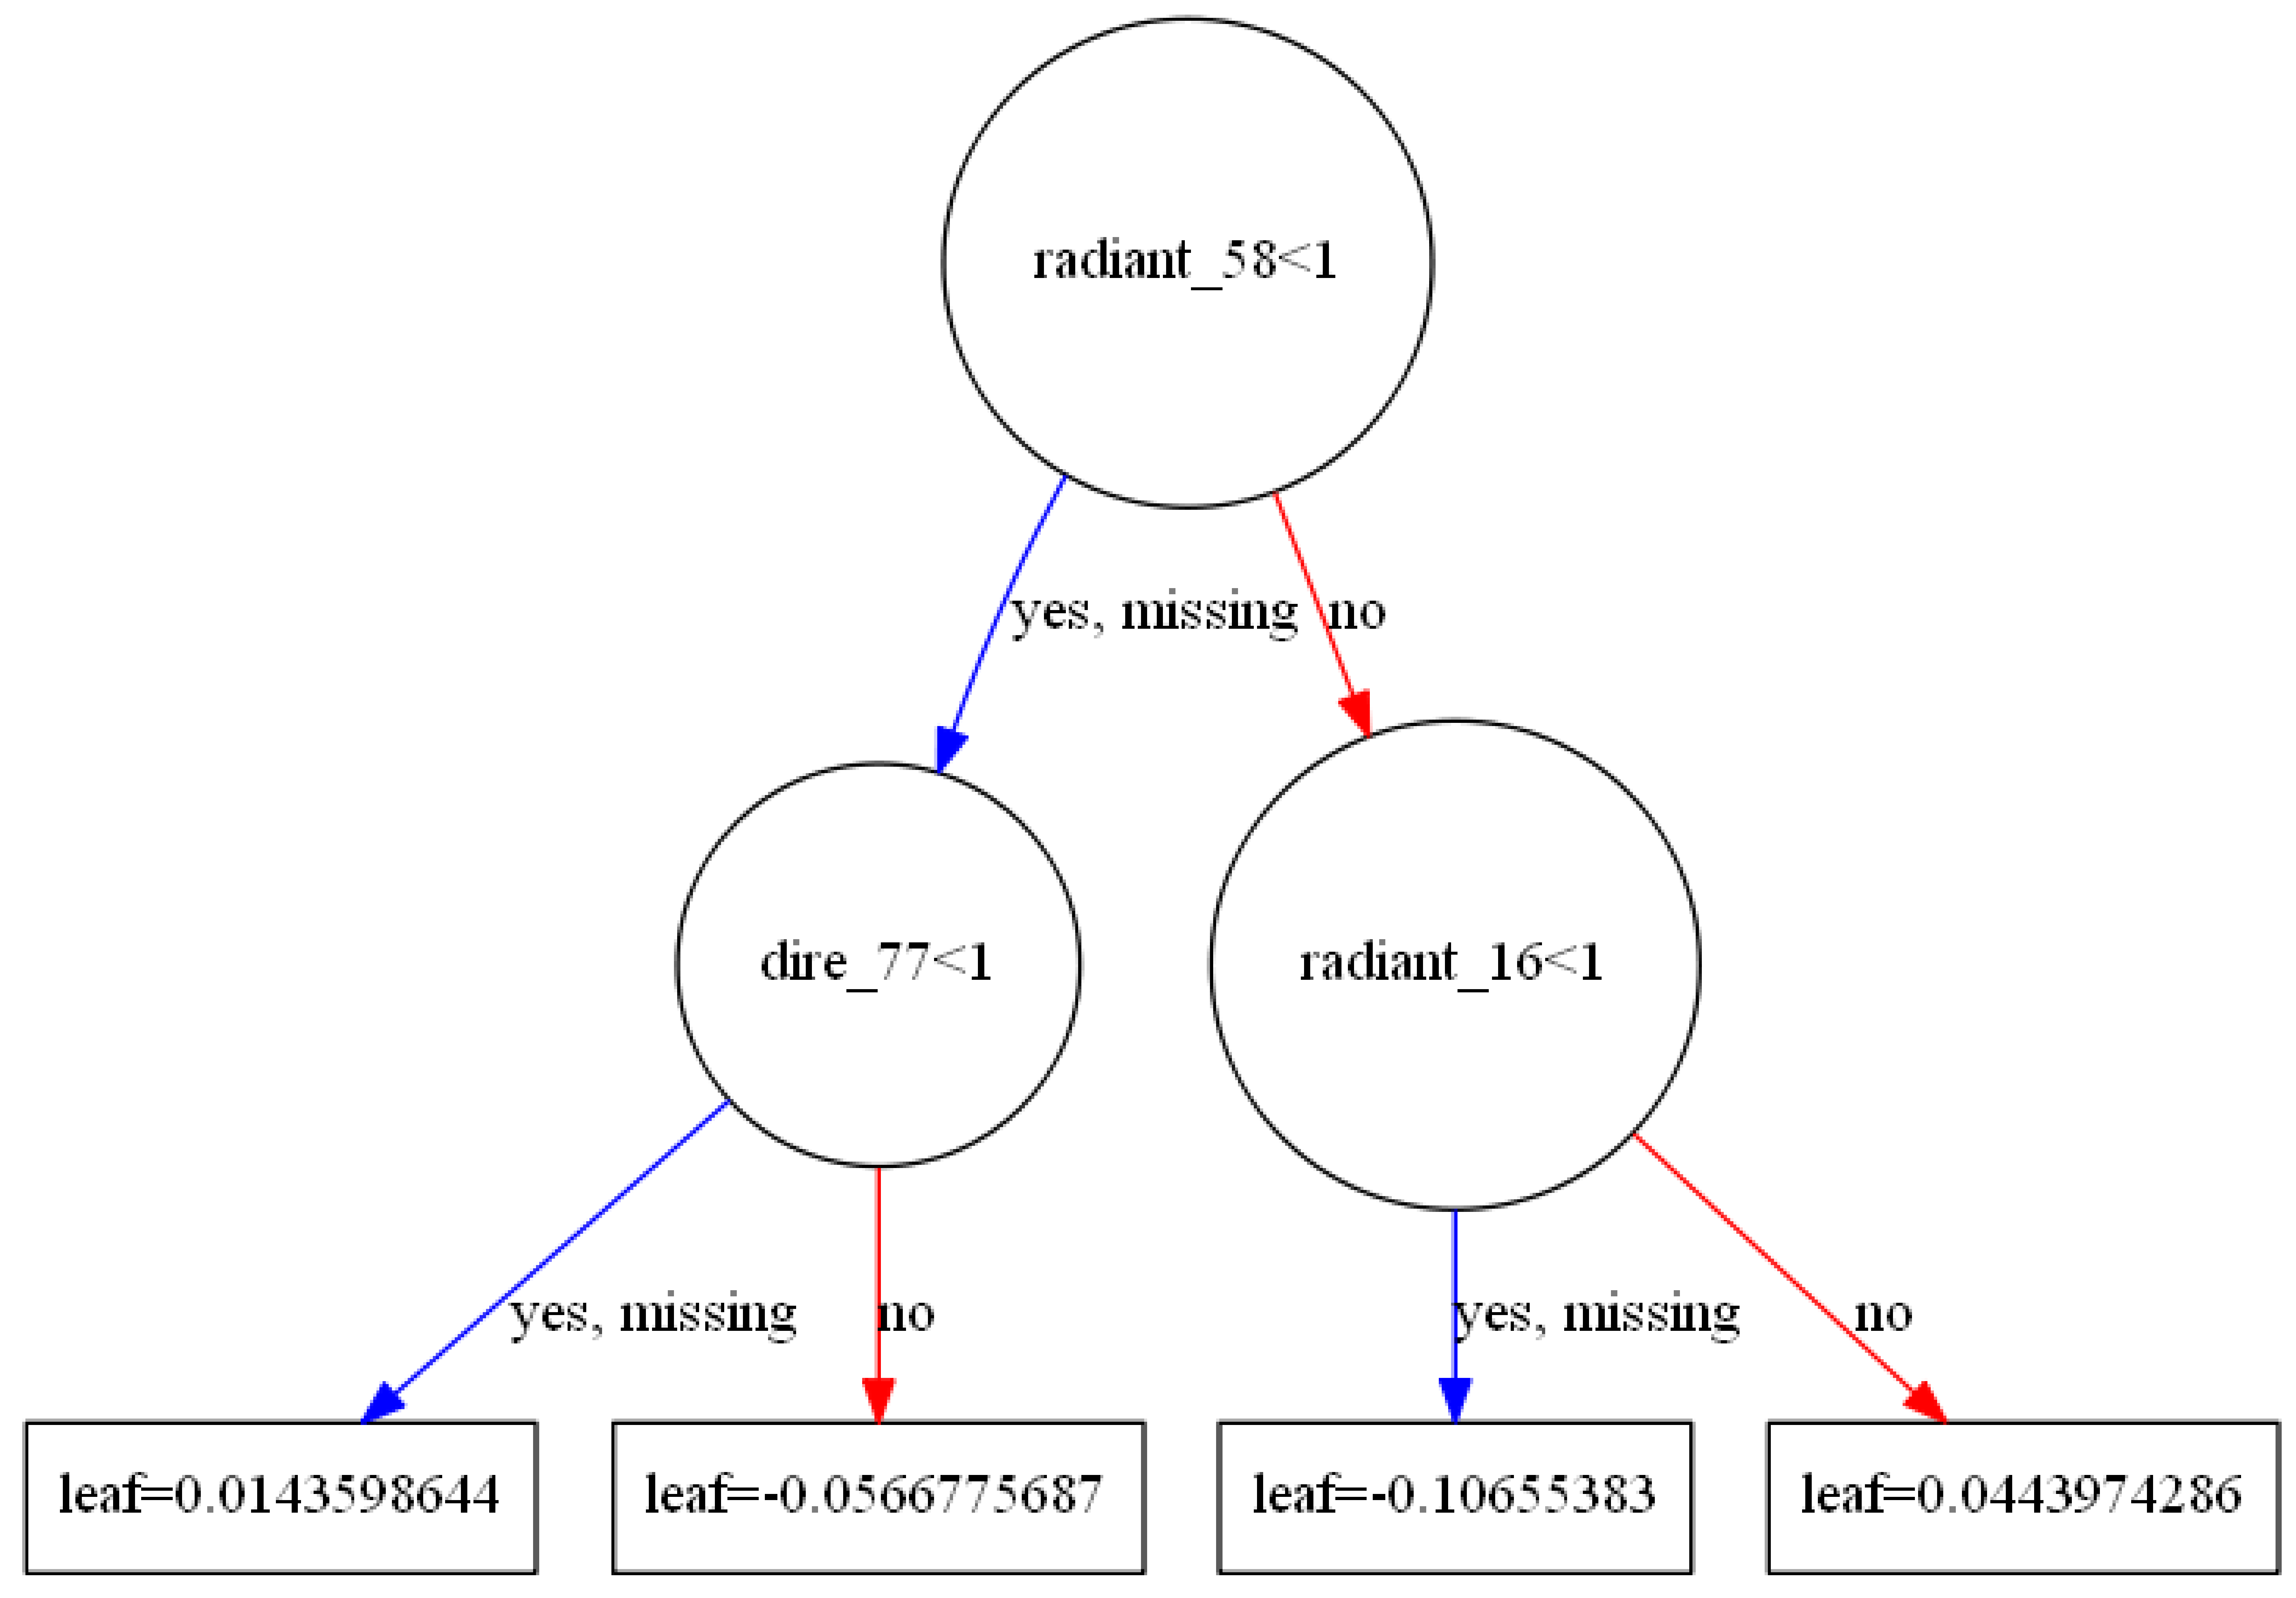

In [152]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
xgb.plot_tree(xgb_final)
fig = plt.gcf()
fig.set_size_inches(150, 100)
fig.savefig('tree.png')

In [154]:
data_df_new

,dire_pick_1,dire_pick_2,dire_pick_3,dire_pick_4,dire_pick_5,dire_team_id,duration,patch,radiant_pick_1,radiant_pick_2,radiant_pick_3,radiant_pick_4,radiant_pick_5,radiant_team_id,start_time,winner,fp_dire,fp_radiant
match_id,,,,,,,,,,,,,,,,,,
4865821968,106,2,57,46,26,1838315,2473,41,97,8,64,111,19,2586976,1561547432,radiant,1,0
4865712667,79,18,25,108,72,1838315,1622,41,71,55,64,74,93,2586976,1561544009,radiant,0,1
4861754075,71,106,112,99,54,1838315,1859,41,96,79,18,57,36,1883502,1561374092,radiant,1,0
4861607434,33,71,8,110,114,1838315,3167,41,37,69,26,80,10,1883502,1561368799,dire,1,0
4861467475,83,46,101,85,54,1838315,3569,41,18,121,71,110,50,1883502,1561363362,radiant,0,1
4857772290,65,106,100,3,113,1838315,4074,41,68,54,7,57,43,6209804,1561213511,dire,0,1
4857623860,71,106,30,16,8,1838315,1631,41,55,107,110,81,13,6209804,1561210430,dire,0,1
4806947177,37,69,129,67,43,39,2325,41,88,55,27,114,89,1838315,1559506018,radiant,1,0
4806839879,68,129,65,17,67,39,1842,41,91,46,102,13,44,1838315,1559502039,dire,0,1


In [159]:
X_full_skimpy = X_full_1.copy()
X_full_skimpy.columns

Index(['patch', 'fp_dire', 'fp_radiant', 'dire_1', 'dire_2', 'dire_3',
       'dire_4', 'dire_5', 'dire_6', 'dire_7',
       ...
       'rad_team_726228', 'rad_team_1375614', 'rad_team_1838315',
       'rad_team_1883502', 'rad_team_2108395', 'rad_team_2586976',
       'rad_team_2626685', 'rad_team_2672298', 'rad_team_6209804',
       'rad_team_6214973'],
      dtype='object', length=271)

In [160]:
for _ in X_full_skimpy.columns:
    print(_)

patch
fp_dire
fp_radiant
dire_1
dire_2
dire_3
dire_4
dire_5
dire_6
dire_7
dire_8
dire_9
dire_10
dire_11
dire_12
dire_13
dire_14
dire_15
dire_16
dire_17
dire_18
dire_19
dire_20
dire_21
dire_22
dire_23
dire_25
dire_26
dire_27
dire_28
dire_29
dire_30
dire_31
dire_32
dire_33
dire_34
dire_35
dire_36
dire_37
dire_38
dire_39
dire_40
dire_41
dire_42
dire_43
dire_44
dire_45
dire_46
dire_47
dire_48
dire_49
dire_50
dire_51
dire_52
dire_53
dire_54
dire_55
dire_56
dire_57
dire_58
dire_59
dire_60
dire_61
dire_62
dire_63
dire_64
dire_65
dire_66
dire_67
dire_68
dire_69
dire_70
dire_71
dire_72
dire_73
dire_74
dire_75
dire_76
dire_77
dire_78
dire_79
dire_80
dire_81
dire_82
dire_83
dire_84
dire_85
dire_86
dire_87
dire_88
dire_89
dire_90
dire_91
dire_92
dire_93
dire_94
dire_95
dire_96
dire_97
dire_98
dire_99
dire_100
dire_101
dire_102
dire_103
dire_104
dire_105
dire_106
dire_107
dire_108
dire_109
dire_110
dire_111
dire_112
dire_113
dire_114
dire_119
dire_120
dire_121
dire_129
radiant_1
radiant_2
radiant_3

In [163]:
X_full_skimpy = X_full_skimpy[['patch', 'fp_dire', 'dire_team_15', 'dire_team_36', 'dire_team_39', 'dire_team_2163', 'dire_team_111474', 'dire_team_350190', 'dire_team_543897', 'dire_team_726228', 'dire_team_1375614', 'dire_team_1838315', 'dire_team_1883502', 'dire_team_2108395', 'dire_team_2586976', 'dire_team_2626685', 'dire_team_2672298', 'dire_team_6209804', 'dire_team_6214973', 'rad_team_15', 'rad_team_36', 'rad_team_39', 'rad_team_2163', 'rad_team_111474', 'rad_team_350190', 'rad_team_543897', 'rad_team_726228', 'rad_team_1375614', 'rad_team_1838315', 'rad_team_1883502', 'rad_team_2108395', 'rad_team_2586976', 'rad_team_2626685', 'rad_team_2672298', 'rad_team_6209804', 'rad_team_6214973']]

In [164]:
X_full_skimpy


,patch,fp_dire,dire_team_15,dire_team_36,dire_team_39,dire_team_2163,dire_team_111474,dire_team_350190,dire_team_543897,dire_team_726228,...,rad_team_726228,rad_team_1375614,rad_team_1838315,rad_team_1883502,rad_team_2108395,rad_team_2586976,rad_team_2626685,rad_team_2672298,rad_team_6209804,rad_team_6214973
match_id,,,,,,,,,,,,,,,,,,,,,
4865821968,41,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4865712667,41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4861754075,41,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4861607434,41,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4861467475,41,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4857772290,41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4857623860,41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4806947177,41,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4806839879,41,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [166]:
X_train_skimpy, X_test_skimpy, y_train_1, y_test_1 = train_test_split(X_full_skimpy, y_full_1, train_size=0.85, test_size=0.15, random_state = 42)

In [167]:
from datetime import datetime
from scipy.stats import uniform, randint
scores = []
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import RandomizedSearchCV

xgb_model_testing = xgb.XGBClassifier()
params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(25, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}
search = RandomizedSearchCV(xgb_model_testing, param_distributions=params, random_state=42, n_iter=200, cv=3, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X_train_skimpy, y_train_1)

report_best_scores(search.cv_results_, 1)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   55.6s finished


Model with rank: 1
Mean validation score: 0.587 (std: 0.027)
Parameters: {'colsample_bytree': 0.810334939815776, 'gamma': 0.31615291529678974, 'learning_rate': 0.2200589132282684, 'max_depth': 4, 'n_estimators': 136, 'subsample': 0.9193380499938204}



0.7568325157673441
0.6071428571428571


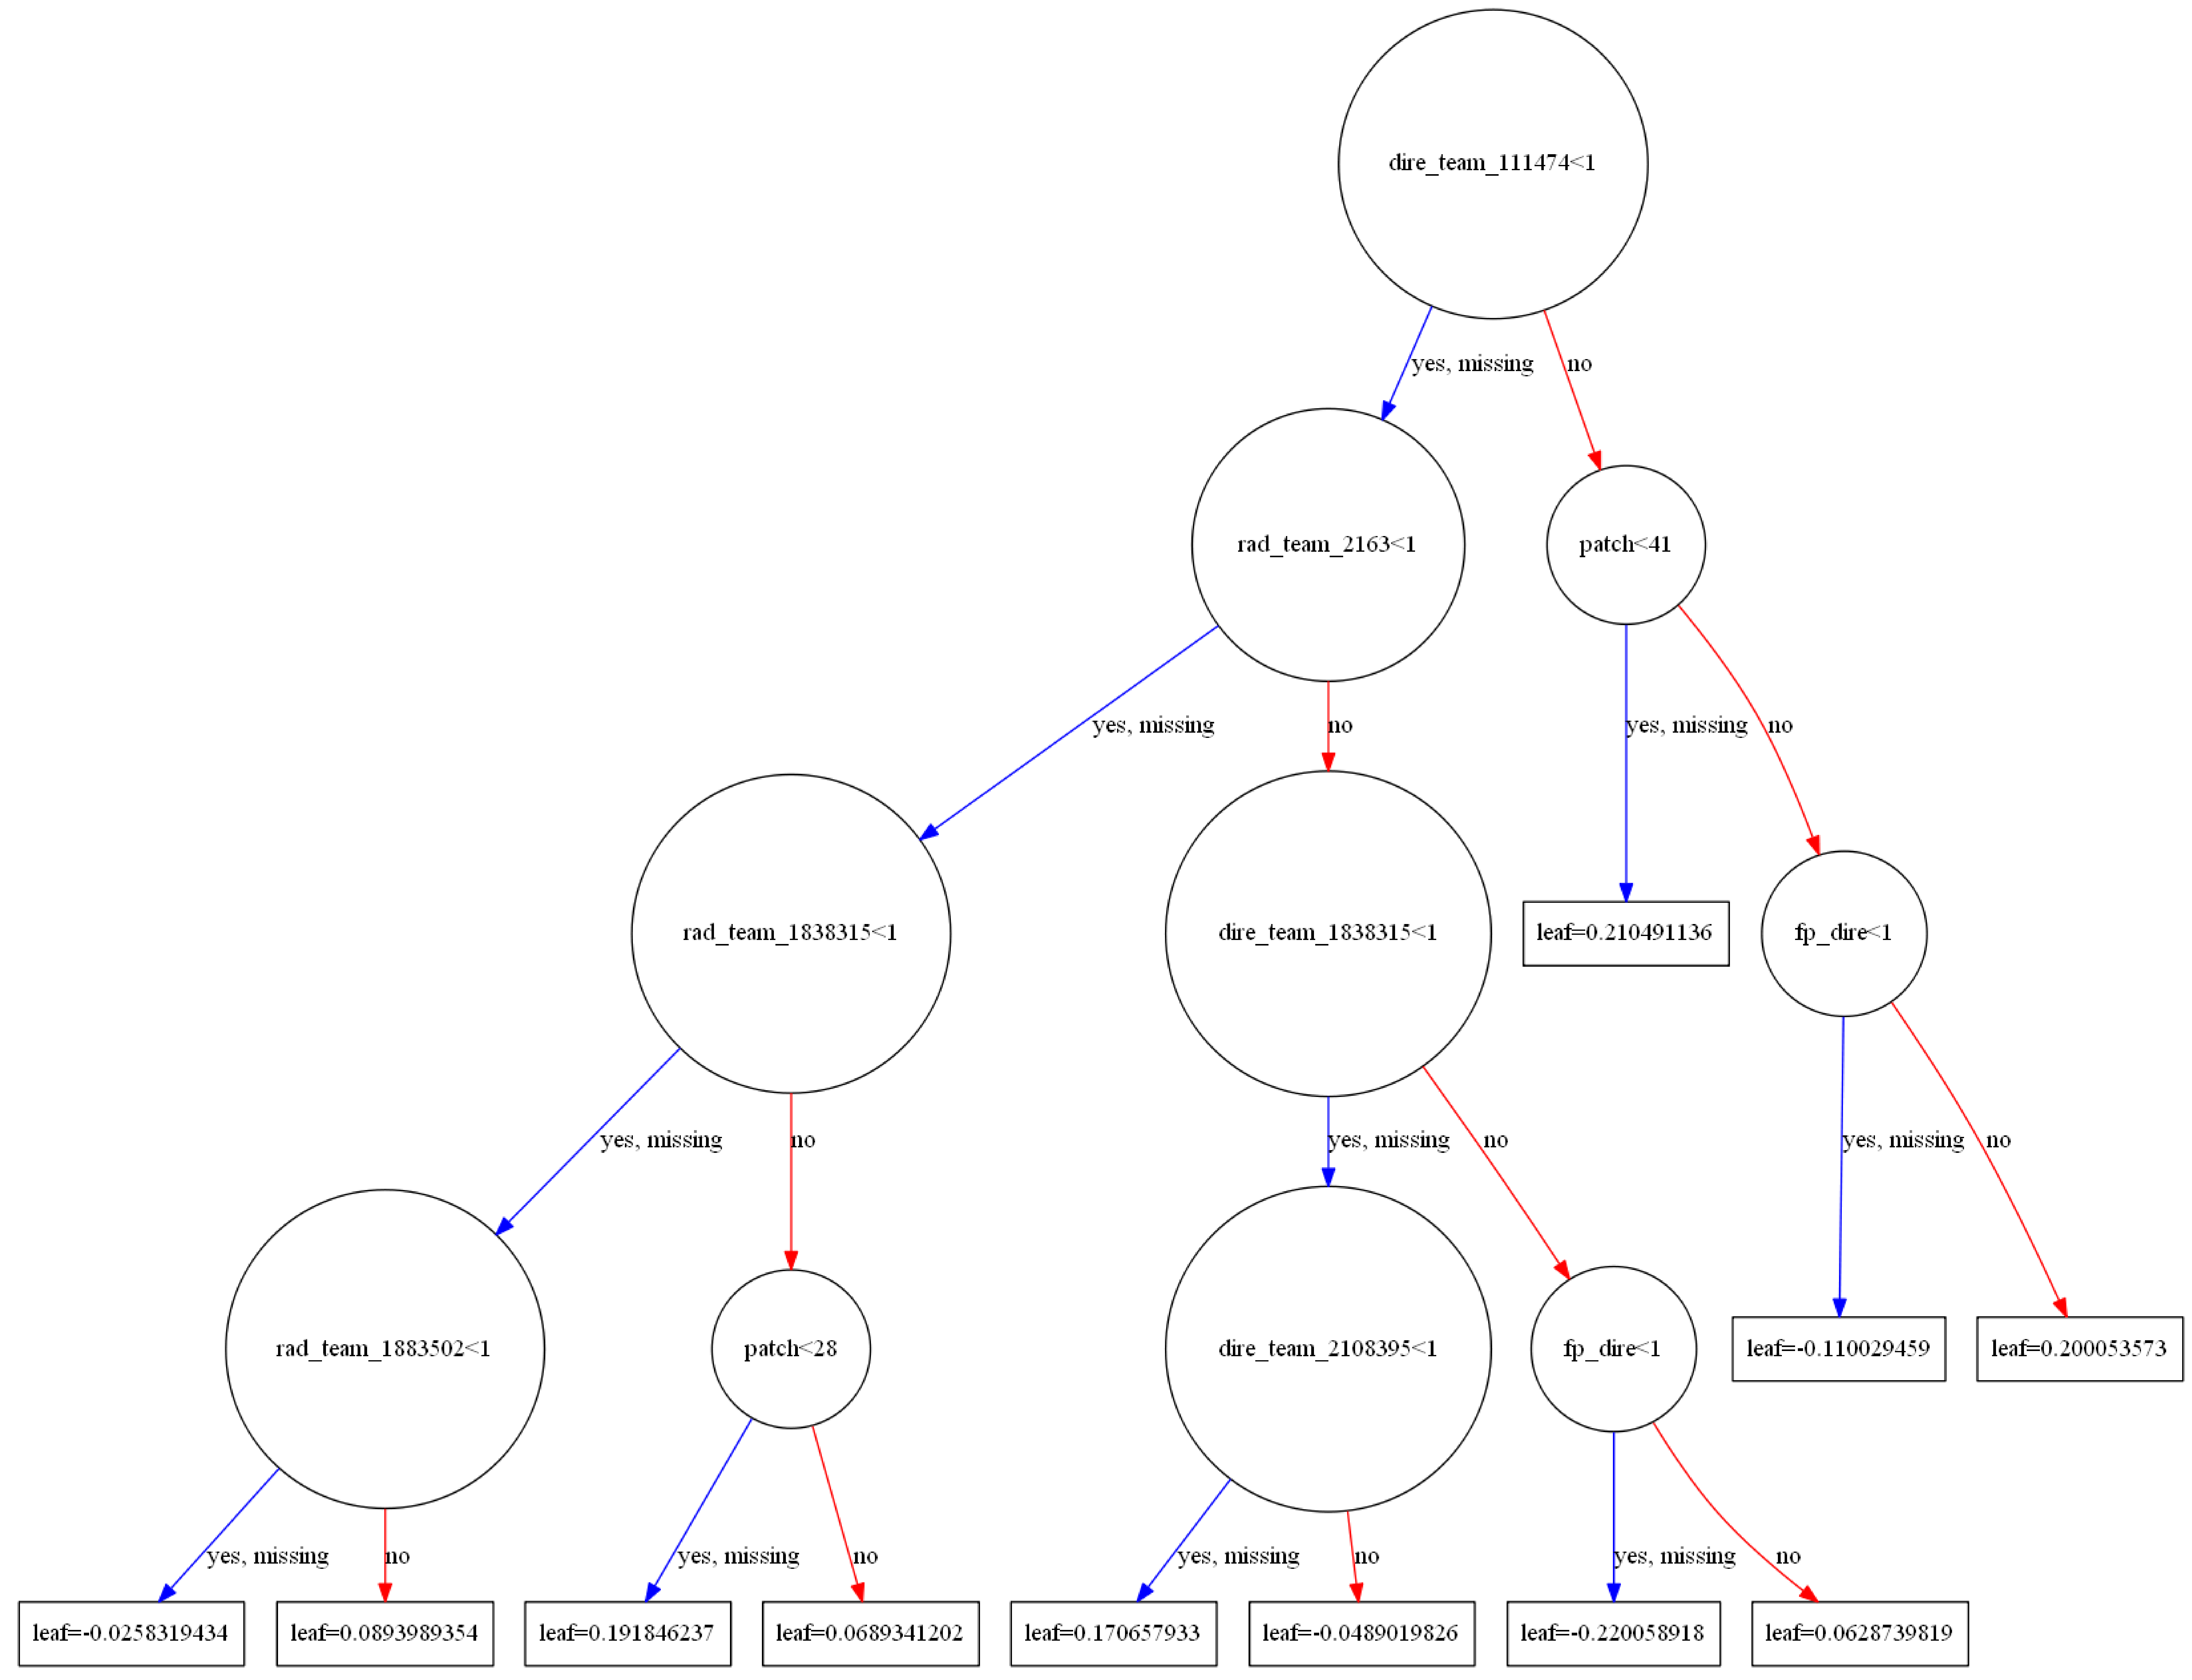

In [169]:
params = {'colsample_bytree': 0.810334939815776, 'gamma': 0.31615291529678974, 'learning_rate': 0.2200589132282684, 'max_depth': 4, 'n_estimators': 136, 'subsample': 0.9193380499938204}
xgb_final = xgb.XGBClassifier(**params)
xgb_final.fit(X_train_skimpy,y_train_1)
print(xgb_final.score(X_train_skimpy,y_train_1))
print(xgb_final.score(X_test_skimpy,y_test_1))
from xgboost import plot_tree
import matplotlib.pyplot as plt
xgb.plot_tree(xgb_final)
fig = plt.gcf()
fig.set_size_inches(150, 100)
fig.savefig('treebleh.png')